In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
train_data_path = "../data/house-prices-advanced-regression-techniques/train.csv"
test_data_path = "../data/house-prices-advanced-regression-techniques/test.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
train_data.shape

(1460, 81)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
null_columns = []

for col in train_data.columns:
    if train_data[col].isna().sum() > 0:
        null_columns.append([train_data[col].isna().sum() * 100 / len(train_data), col])

null_columns.sort()
null_columns.reverse()
null_columns

[[99.52054794520548, 'PoolQC'],
 [96.3013698630137, 'MiscFeature'],
 [93.76712328767124, 'Alley'],
 [80.75342465753425, 'Fence'],
 [47.26027397260274, 'FireplaceQu'],
 [17.73972602739726, 'LotFrontage'],
 [5.5479452054794525, 'GarageYrBlt'],
 [5.5479452054794525, 'GarageType'],
 [5.5479452054794525, 'GarageQual'],
 [5.5479452054794525, 'GarageFinish'],
 [5.5479452054794525, 'GarageCond'],
 [2.6027397260273974, 'BsmtFinType2'],
 [2.6027397260273974, 'BsmtExposure'],
 [2.5342465753424657, 'BsmtQual'],
 [2.5342465753424657, 'BsmtFinType1'],
 [2.5342465753424657, 'BsmtCond'],
 [0.547945205479452, 'MasVnrType'],
 [0.547945205479452, 'MasVnrArea'],
 [0.0684931506849315, 'Electrical']]

In [18]:
def distribution(col, with_log):
    for j, i in enumerate(col):
        dataset = train_data.copy()
        if with_log:
            dataset[col] = np.log(dataset[col])
        sns.histplot(data=dataset, x=i, kde=True)
        plt.show()
    return

def Scatter(col, with_log):

    dataset = train_data.copy()
    for j, i in enumerate(col):
        if with_log:
            dataset[col] = np.log(dataset[col])

        plt.figure(figsize=(4, 3))
        sns.regplot(
            data=dataset,
            x=i,
            y="SalePrice",
        )
        plt.show()
    return

def Heat_map(col):
    dataset = train_data[col].copy()
    corr = dataset.corr()
    plt.figure(figsize=(25, 13))
    sns.heatmap(corr,cmap="YlGnBu" ,annot=True)

def years_lineplot(year_columns):
    plt.figure(figsize=(20, 20))
    dataset = train_data.copy()
    for i, col in enumerate(year_columns):
        plt.subplot(6, 4, i + 1)
        dataset.groupby(col)["SalePrice"].median().plot()
        plt.xlabel(col)
        plt.ylabel("Median House Price")
        plt.title("House Price vs YearSold")

def null_columns_relation(col):
    plt.figure(figsize=(20, 20))

    for i, col in enumerate(col):
        temp_dataset = train_data.copy()
        # indicates 1 if value is null otherwize 0
        temp_dataset[col] = np.where(temp_dataset[col].isnull(), 1, 0)
        plt.subplot(6, 4, i + 1)
        # Now we need to create a bar plot to visualize the SalePrice of null values
        sns.barplot(
            data=temp_dataset,
            x=col,
            y="SalePrice",
            width=0.2,
            saturation=0.5,
            errorbar=None,
        )
        plt.yticks(np.arange(0, 200000, 25000))


def numerical_discrete_columns(numerical_discrete):
    plt.figure(figsize=(30, 30))
    dataset = train_data.copy()
    for i, col in enumerate(numerical_discrete):
        plt.subplot(5, 4, i + 1)
        sns.barplot(
            data=dataset,
            x=col,
            y="SalePrice",
            width=0.5,
            estimator=np.std,
            saturation=0.5,
            errorbar=None,
        )
        plt.xticks(rotation=90)
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.title(col)
        

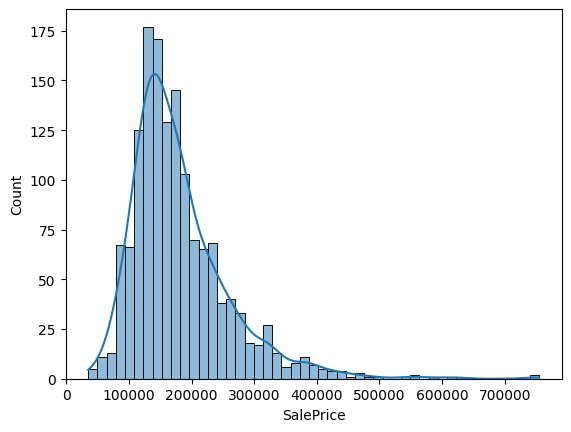

skew 1.8828757597682129
kurt 6.536281860064529


In [19]:
pd.option_context('mode.use_inf_as_na', True)

distribution(["SalePrice"], 0)

print("skew", train_data["SalePrice"].skew())
print("kurt", train_data["SalePrice"].kurt())

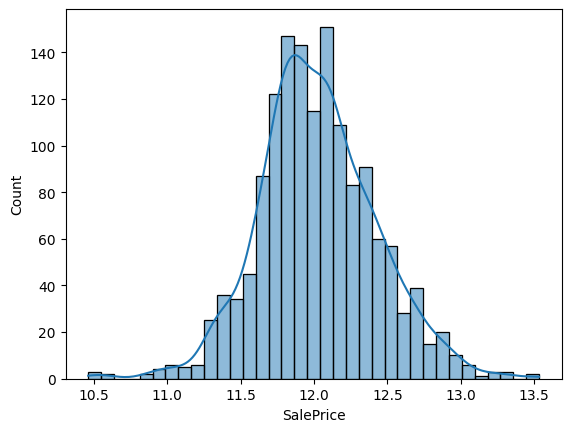

In [20]:
distribution(["SalePrice"], 1)

In [21]:
numerical_cols =  train_data.dtypes[train_data.dtypes != 'object'].index.tolist()
categorical_cols =  train_data.dtypes[train_data.dtypes == 'object'].index.tolist()

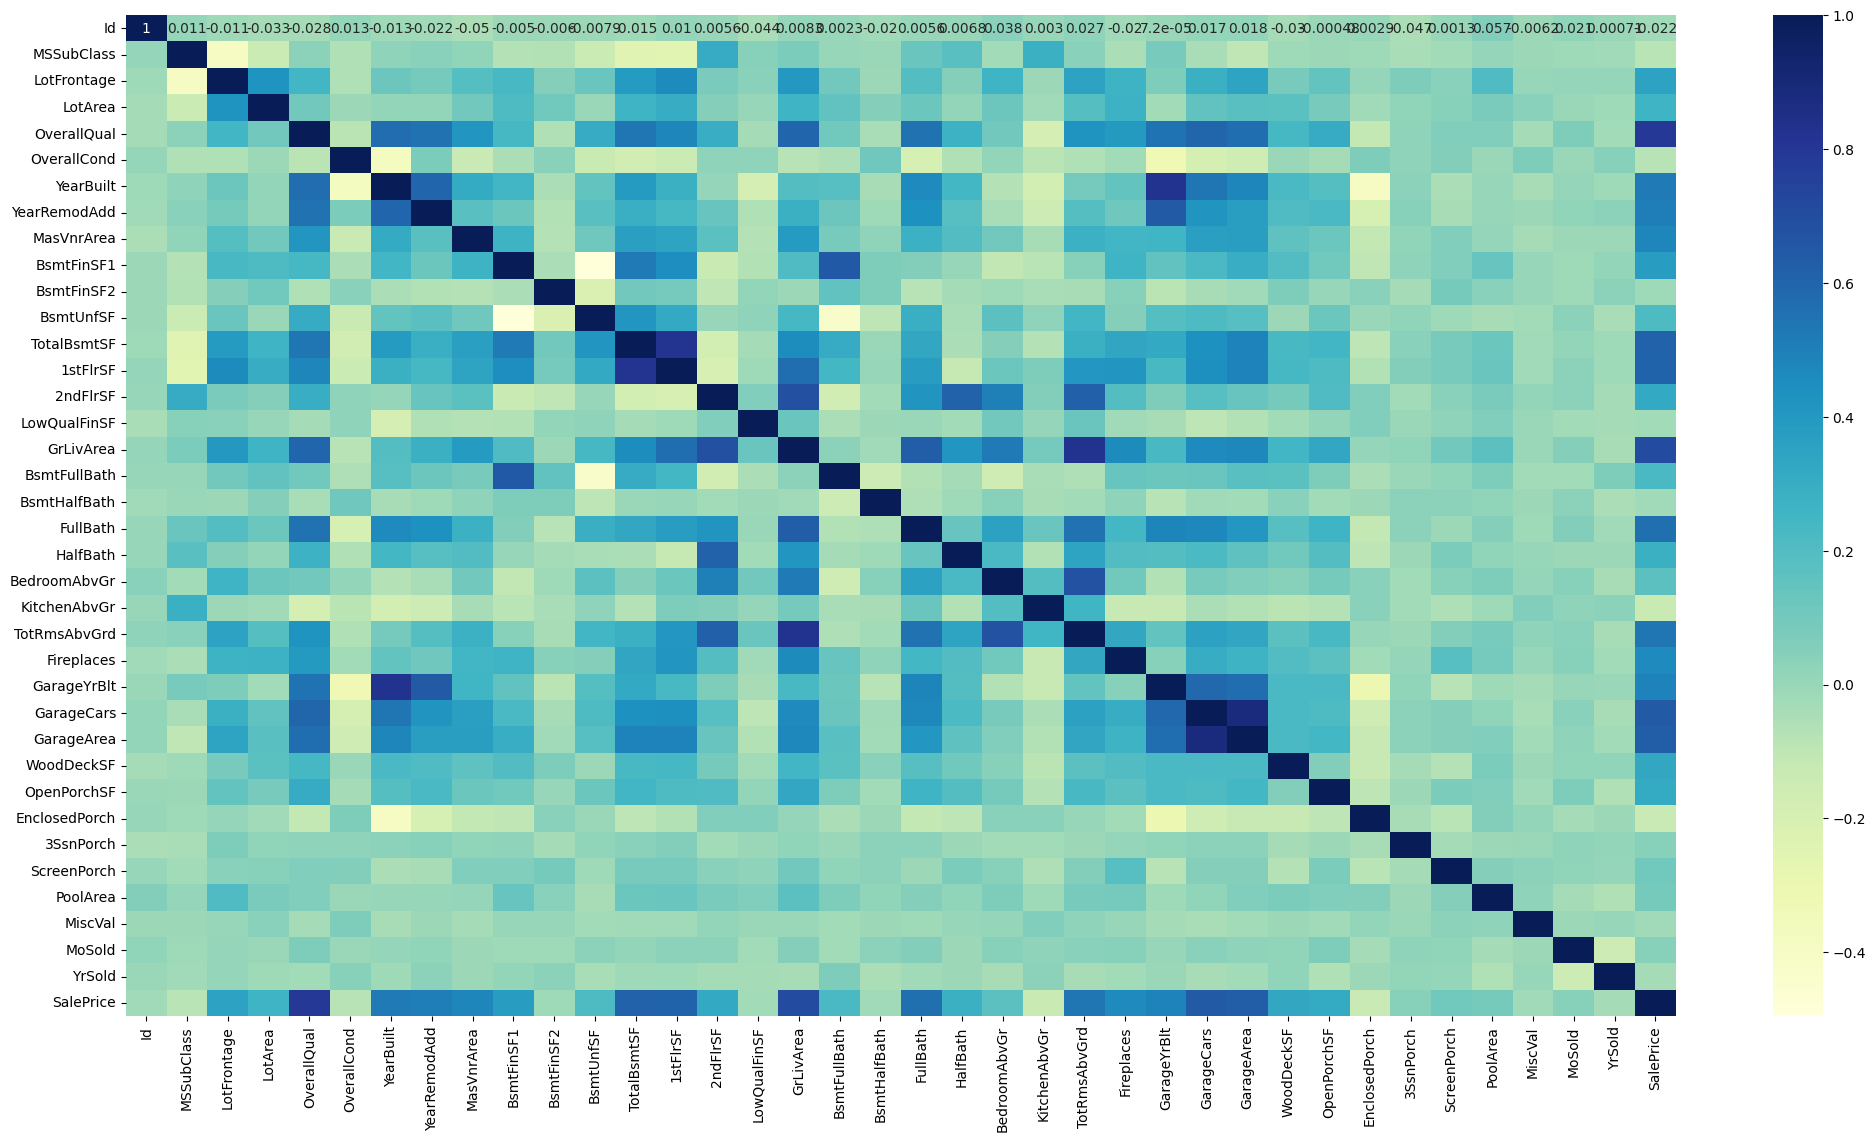

In [22]:
Heat_map(numerical_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea']


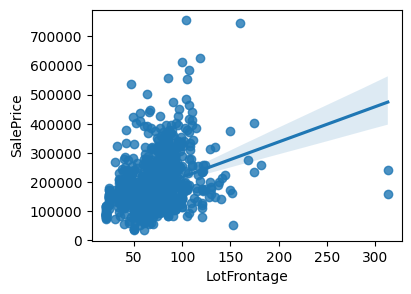

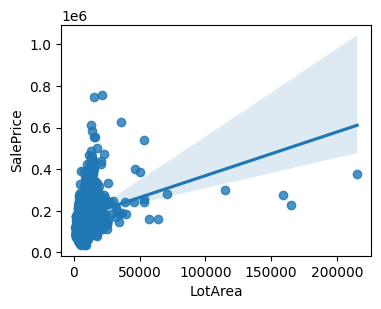

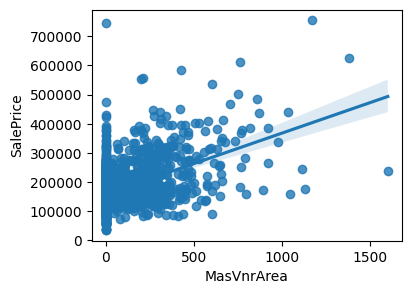

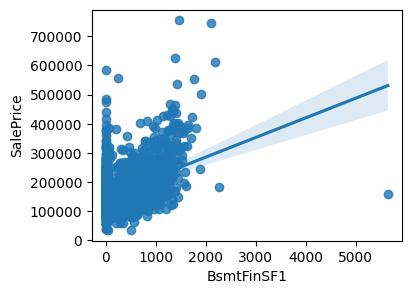

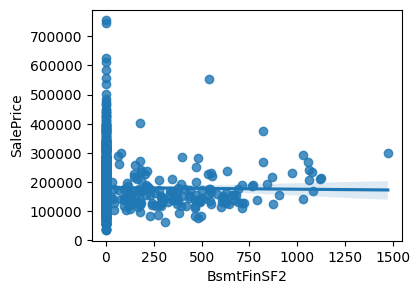

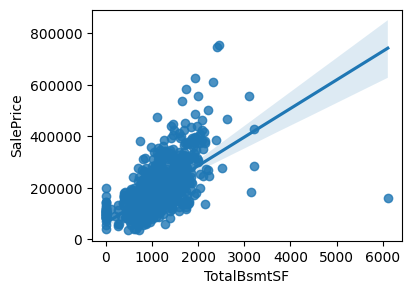

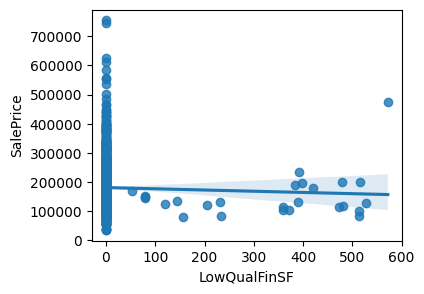

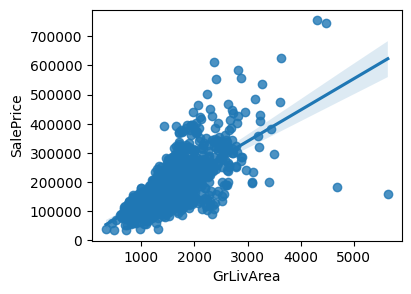

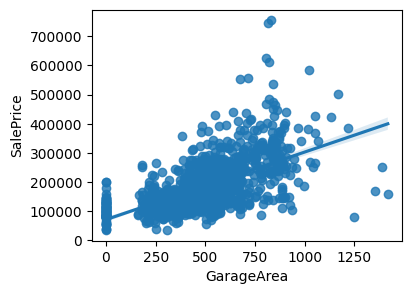

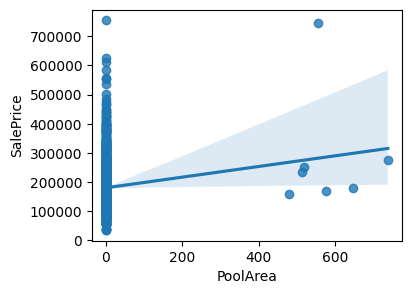

In [23]:
## get all columns with areas to find the relathon between them and price
areas = []
for i in numerical_cols:
    if (i.find("Area") != -1
        or i.find("Lot") != -1
        or i.find("FinSF") != -1
        or i.find("TotalBsmtSF") != -1):
        areas.append(i)
        
print(areas)
Scatter(areas, 0)

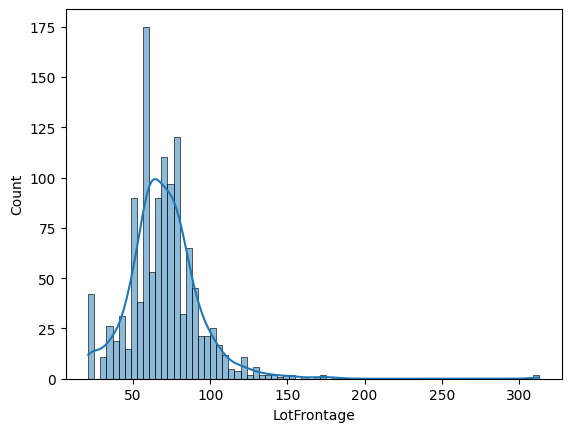

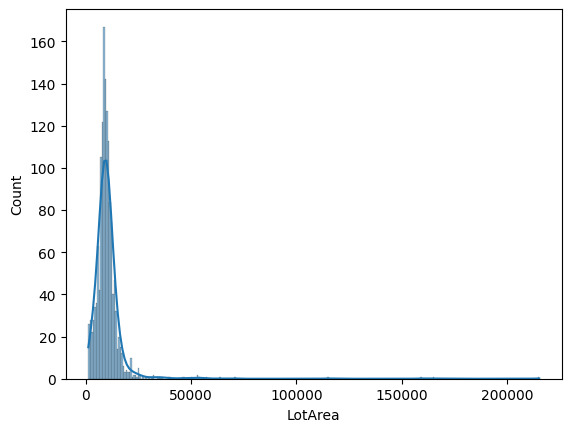

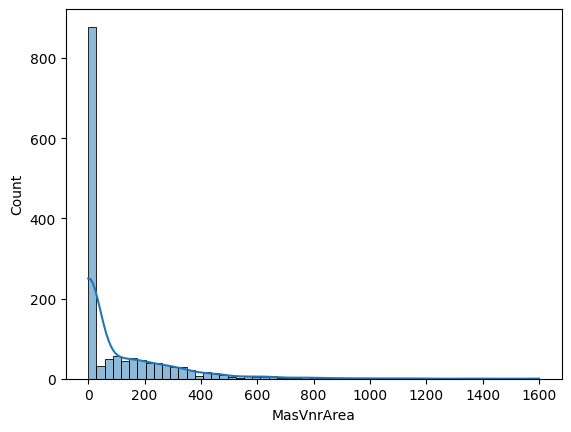

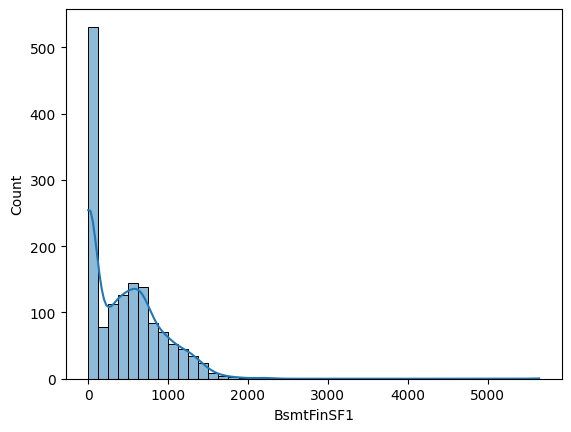

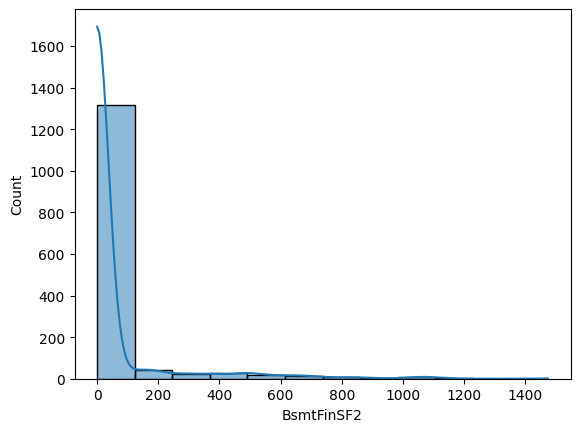

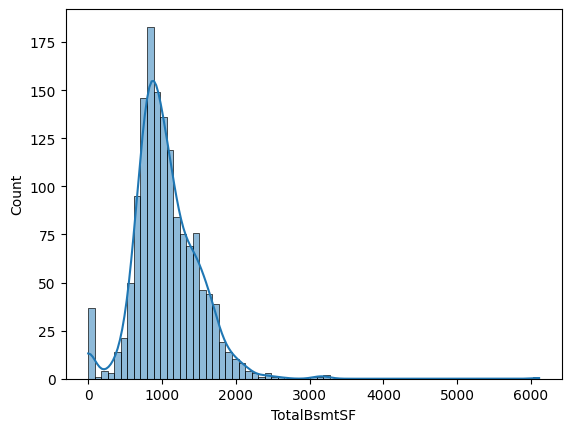

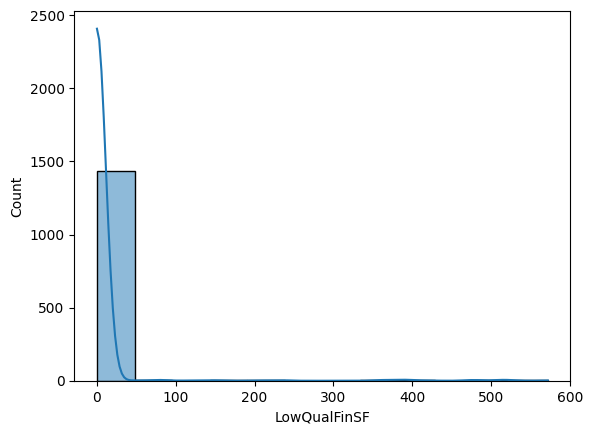

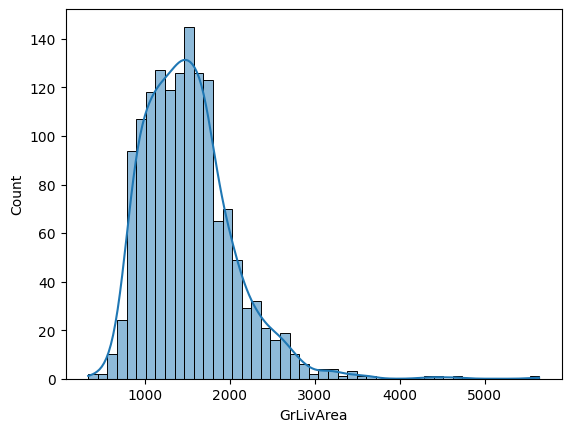

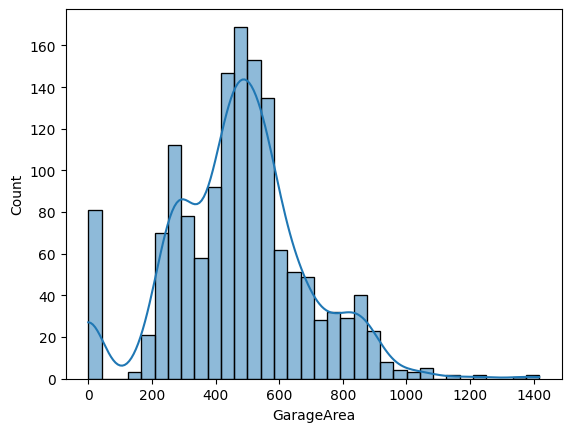

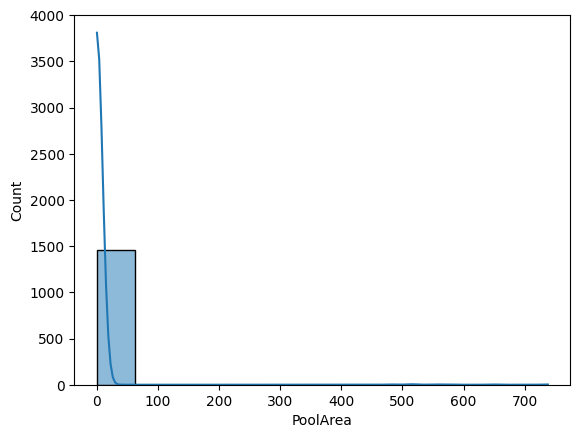

In [24]:
distribution(areas, 0)

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


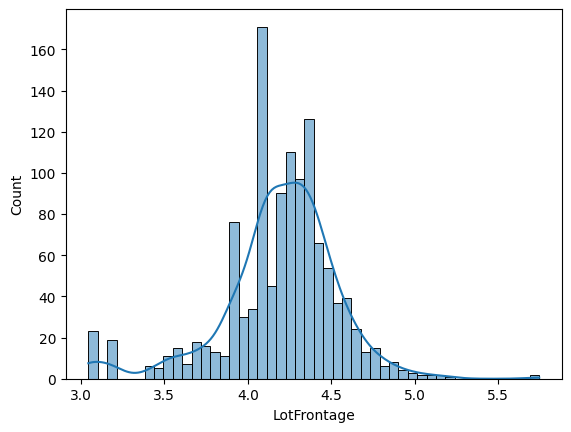

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


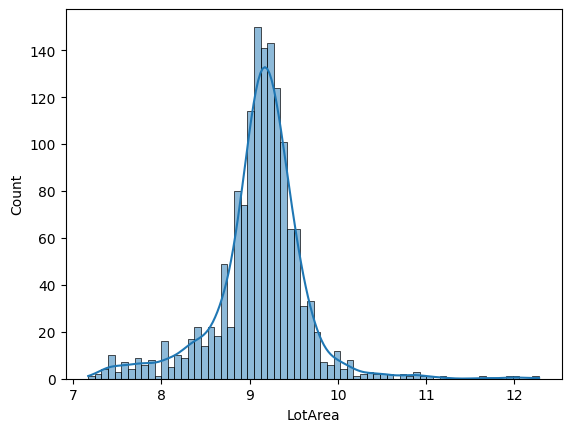

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


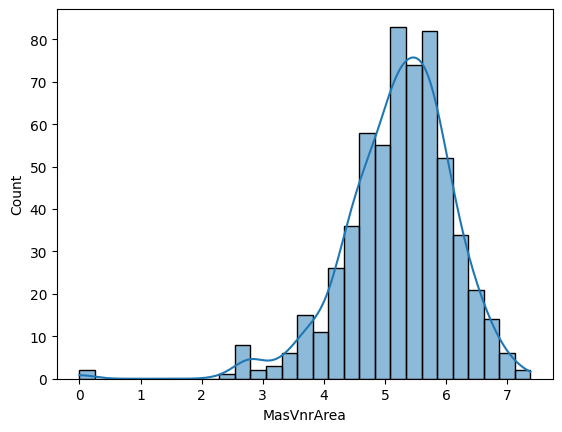

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


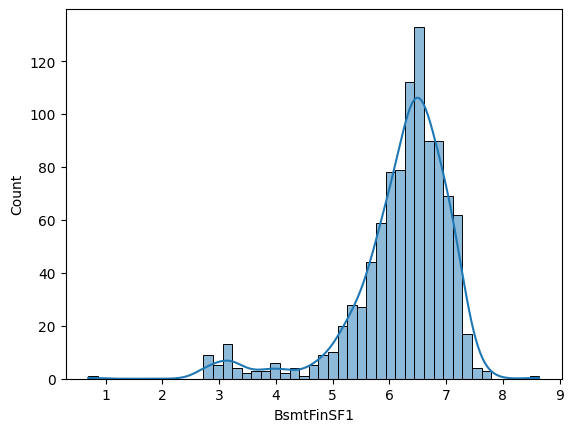

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


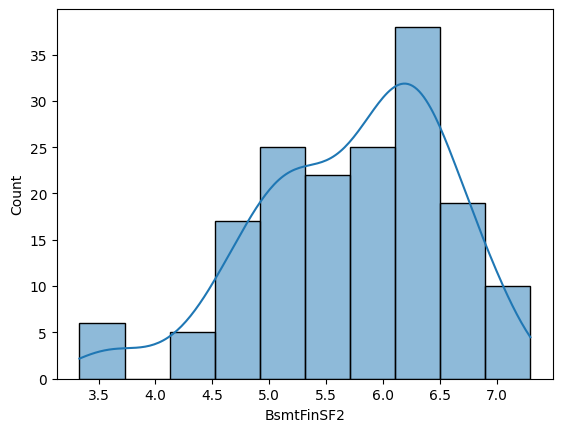

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


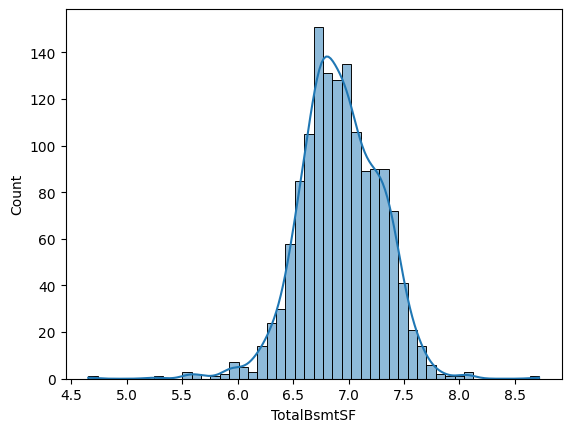

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


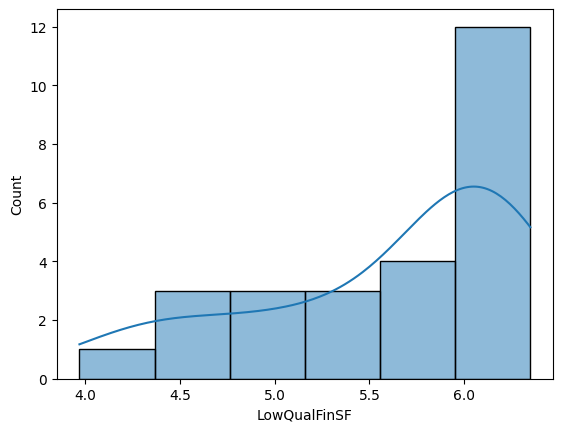

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


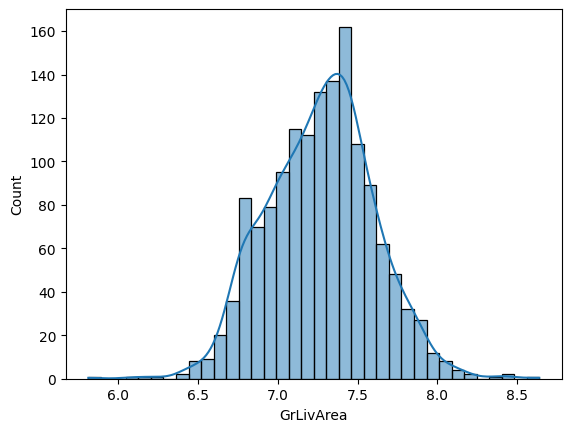

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


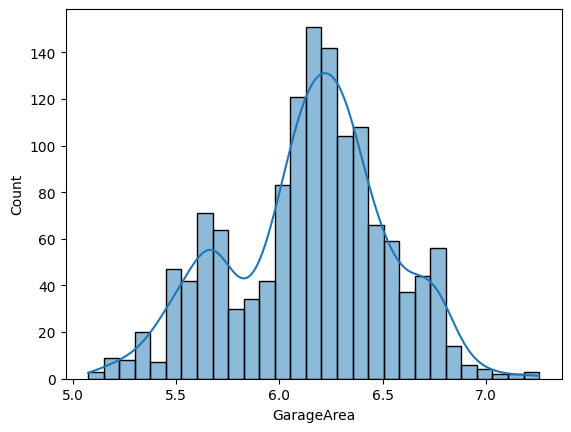

/home/godwin/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


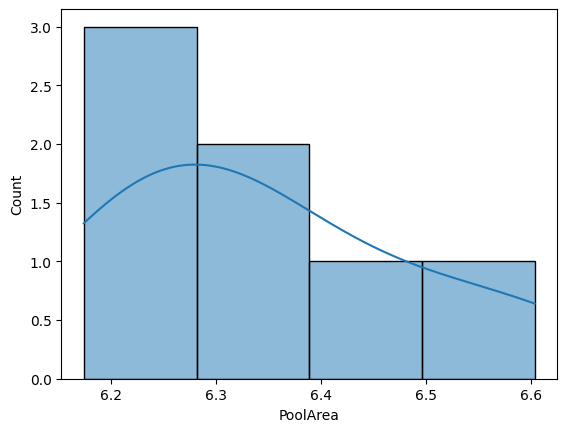

In [25]:
distribution(areas, 1)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


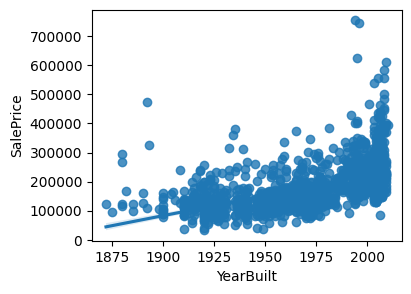

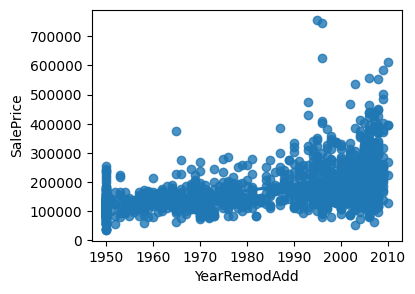

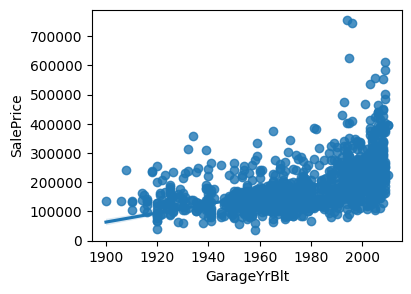

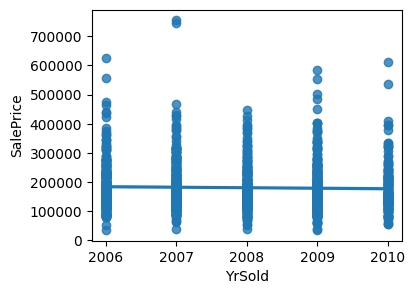

In [26]:
## get all columns with Year to find the relathon between them and price
Years = []
for i in numerical_cols:
    if i.find("Year") != -1 or i.find("Yr") != -1:
        Years.append(i)
print(Years)
Scatter(Years, 0)

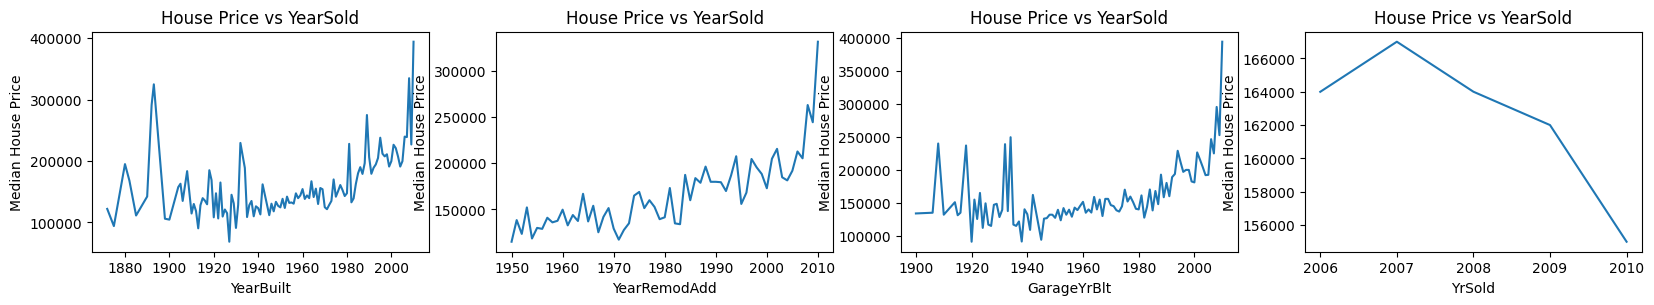

In [27]:
years_lineplot(Years)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


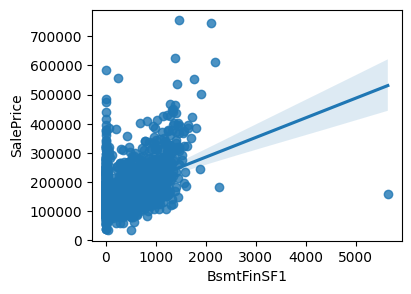

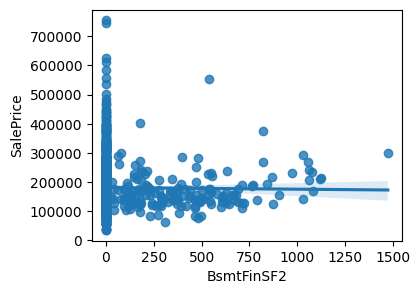

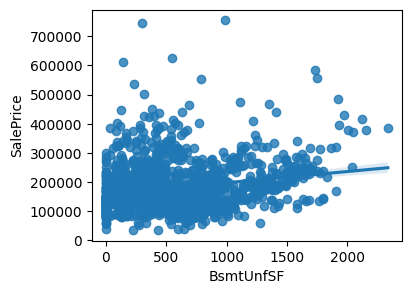

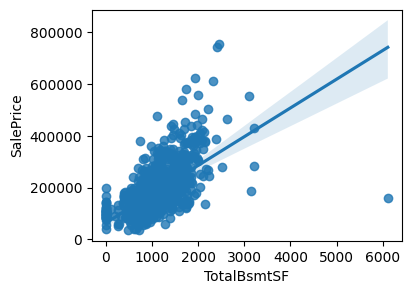

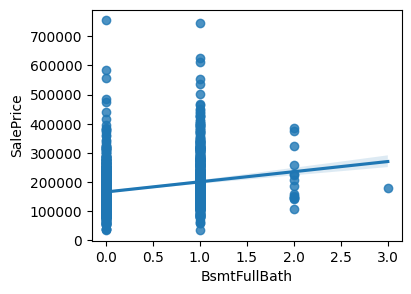

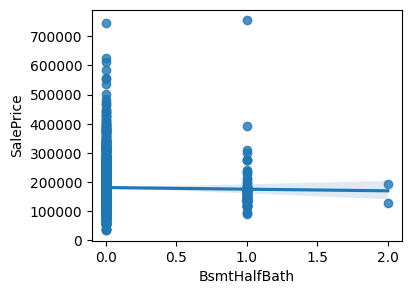

In [28]:
## get all columns with Bsmt to find the relathon between them and price
Bsmt = []
for i in numerical_cols:
    if i.find("Bsmt") != -1:
        Bsmt.append(i)
print(Bsmt)
Scatter(Bsmt, 0)

['BedroomAbvGr', 'KitchenAbvGr']


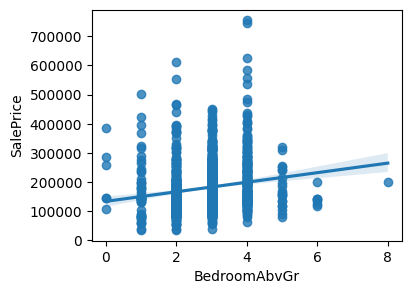

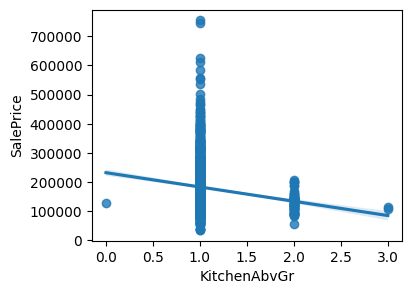

In [29]:
## get all columns with Kitchen and  Bed to find the relathon between them and price
KitchenBed = []
for i in numerical_cols:
    if i.find("Bed") != -1 or i.find("Kitchen") != -1:
        KitchenBed.append(i)
print(KitchenBed)
Scatter(KitchenBed, 0)

In [30]:
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

Outlier

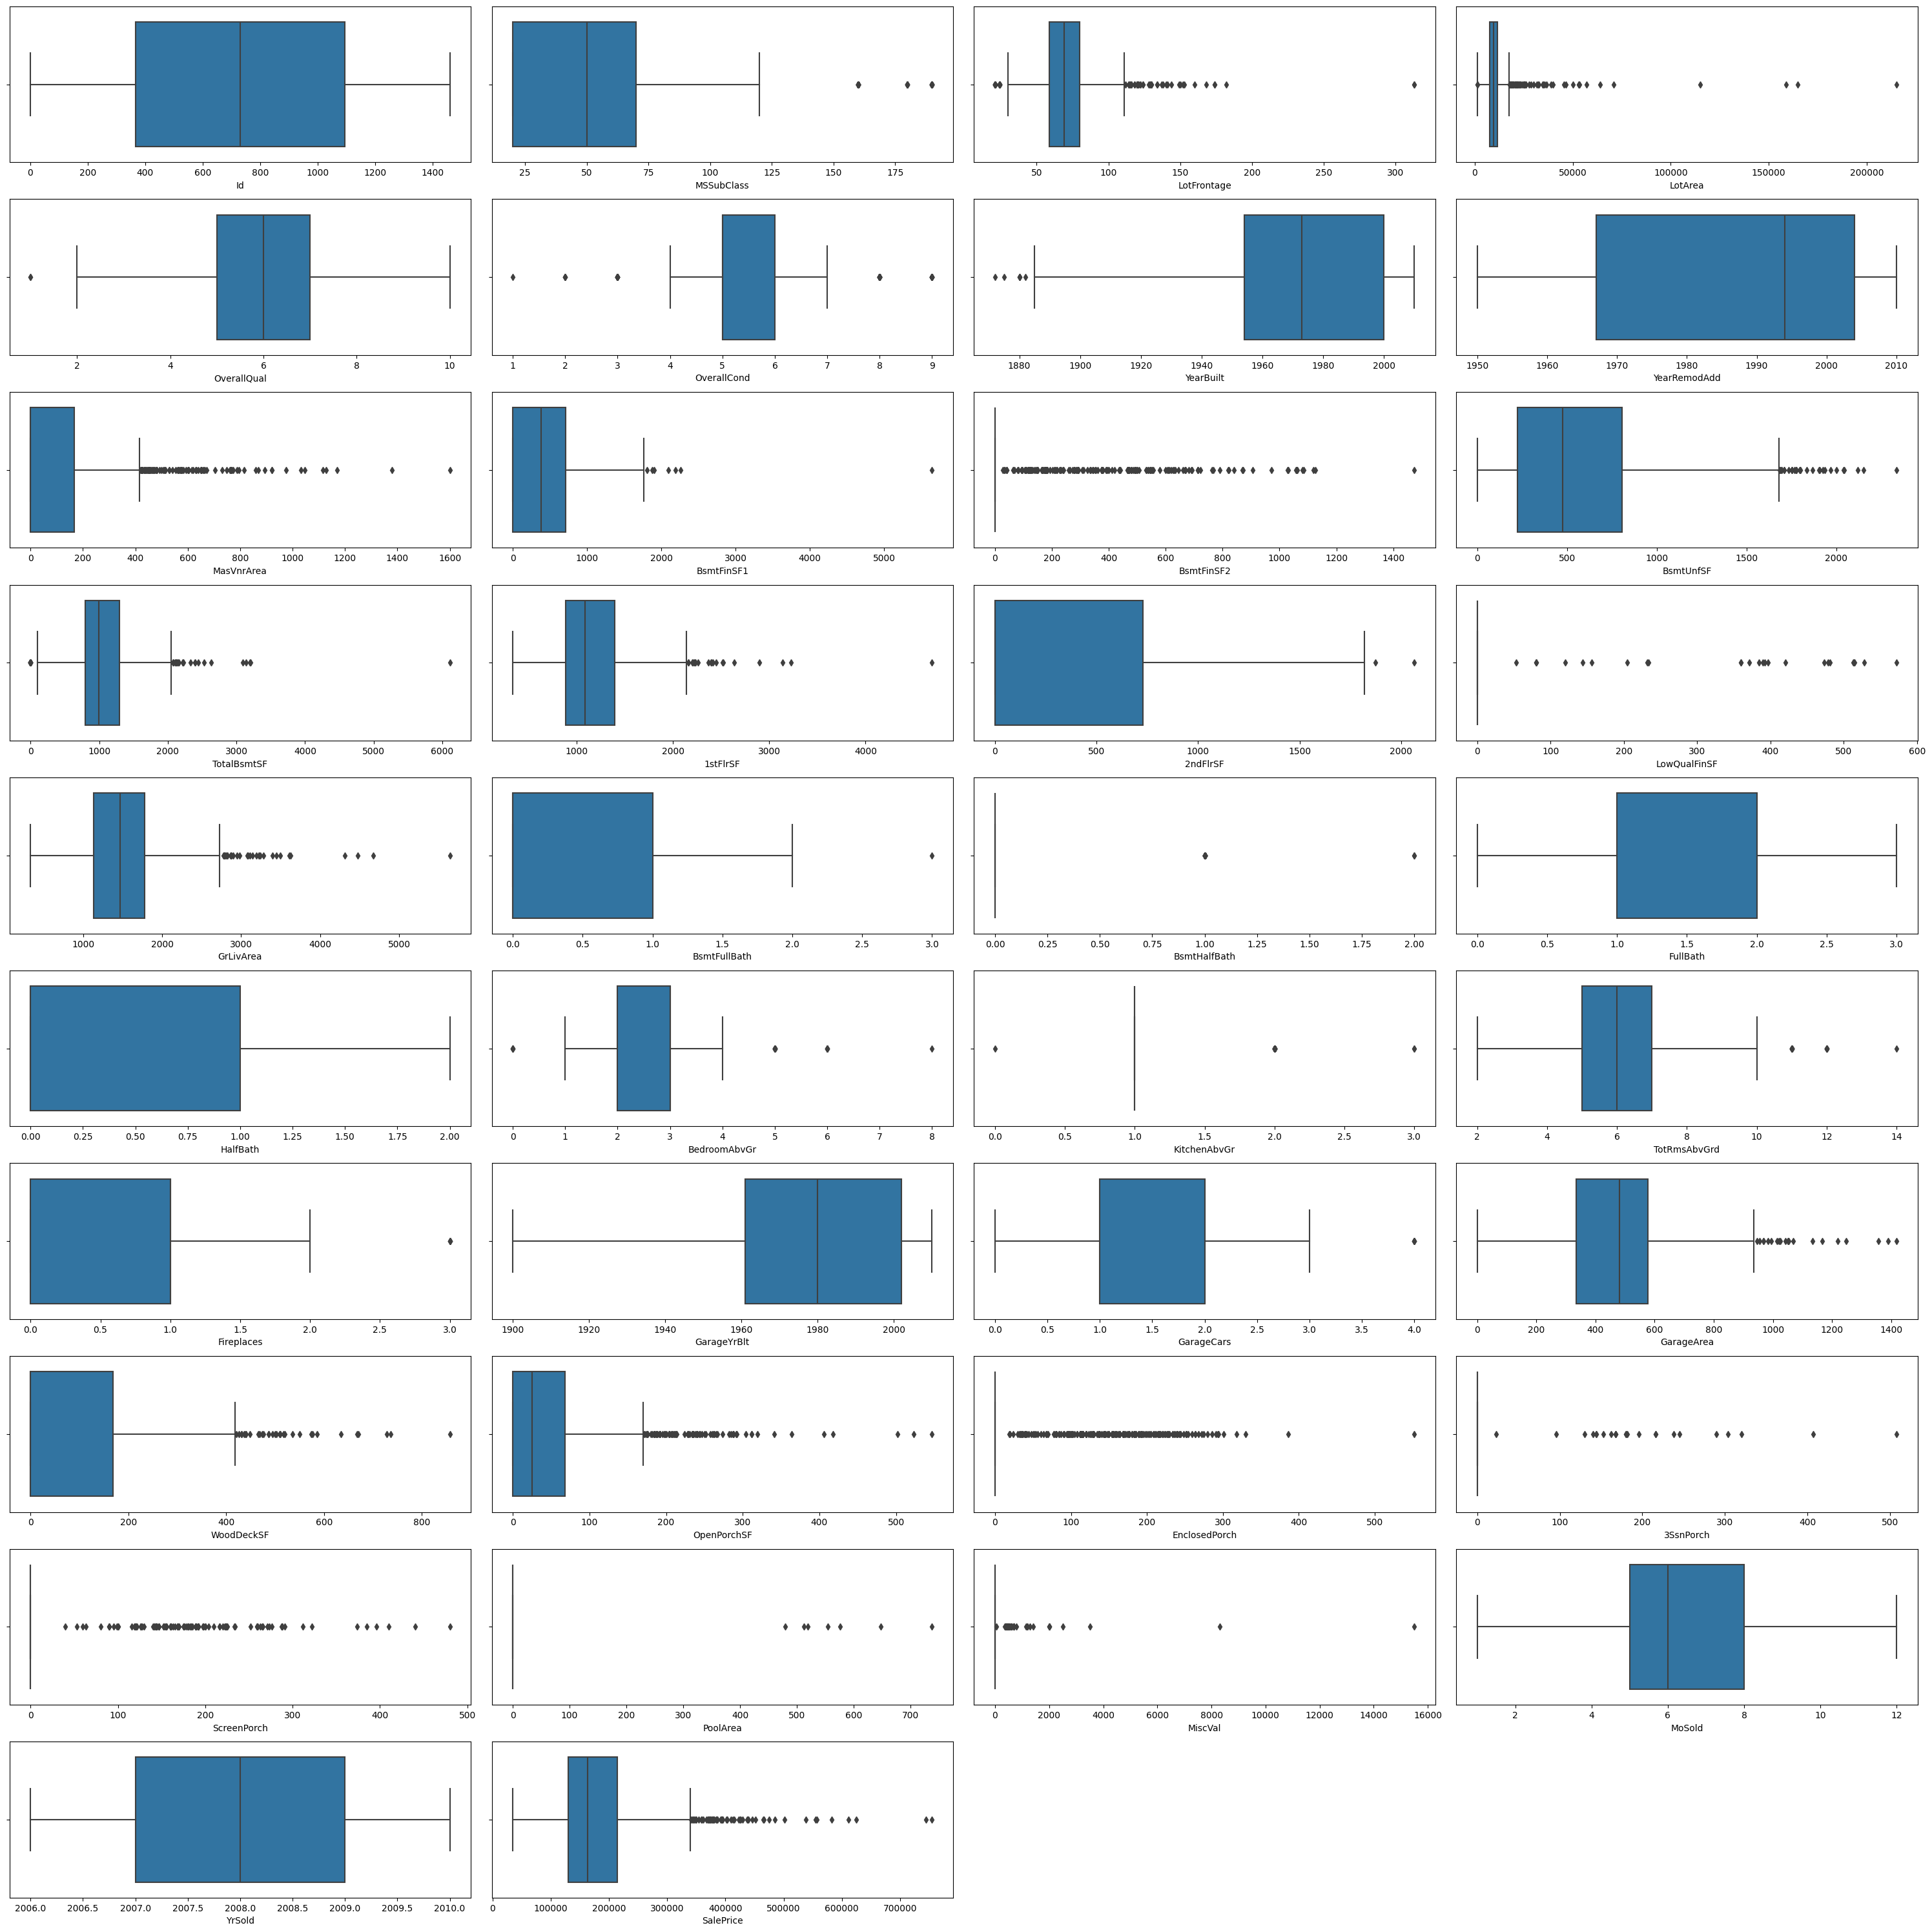

In [31]:
# fig, axs = plt.subplots(8, 5, figsize=(14, 15))
fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(numerical_cols):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=train_data, x=i)
fig.tight_layout(pad=1.0)

plt.show()

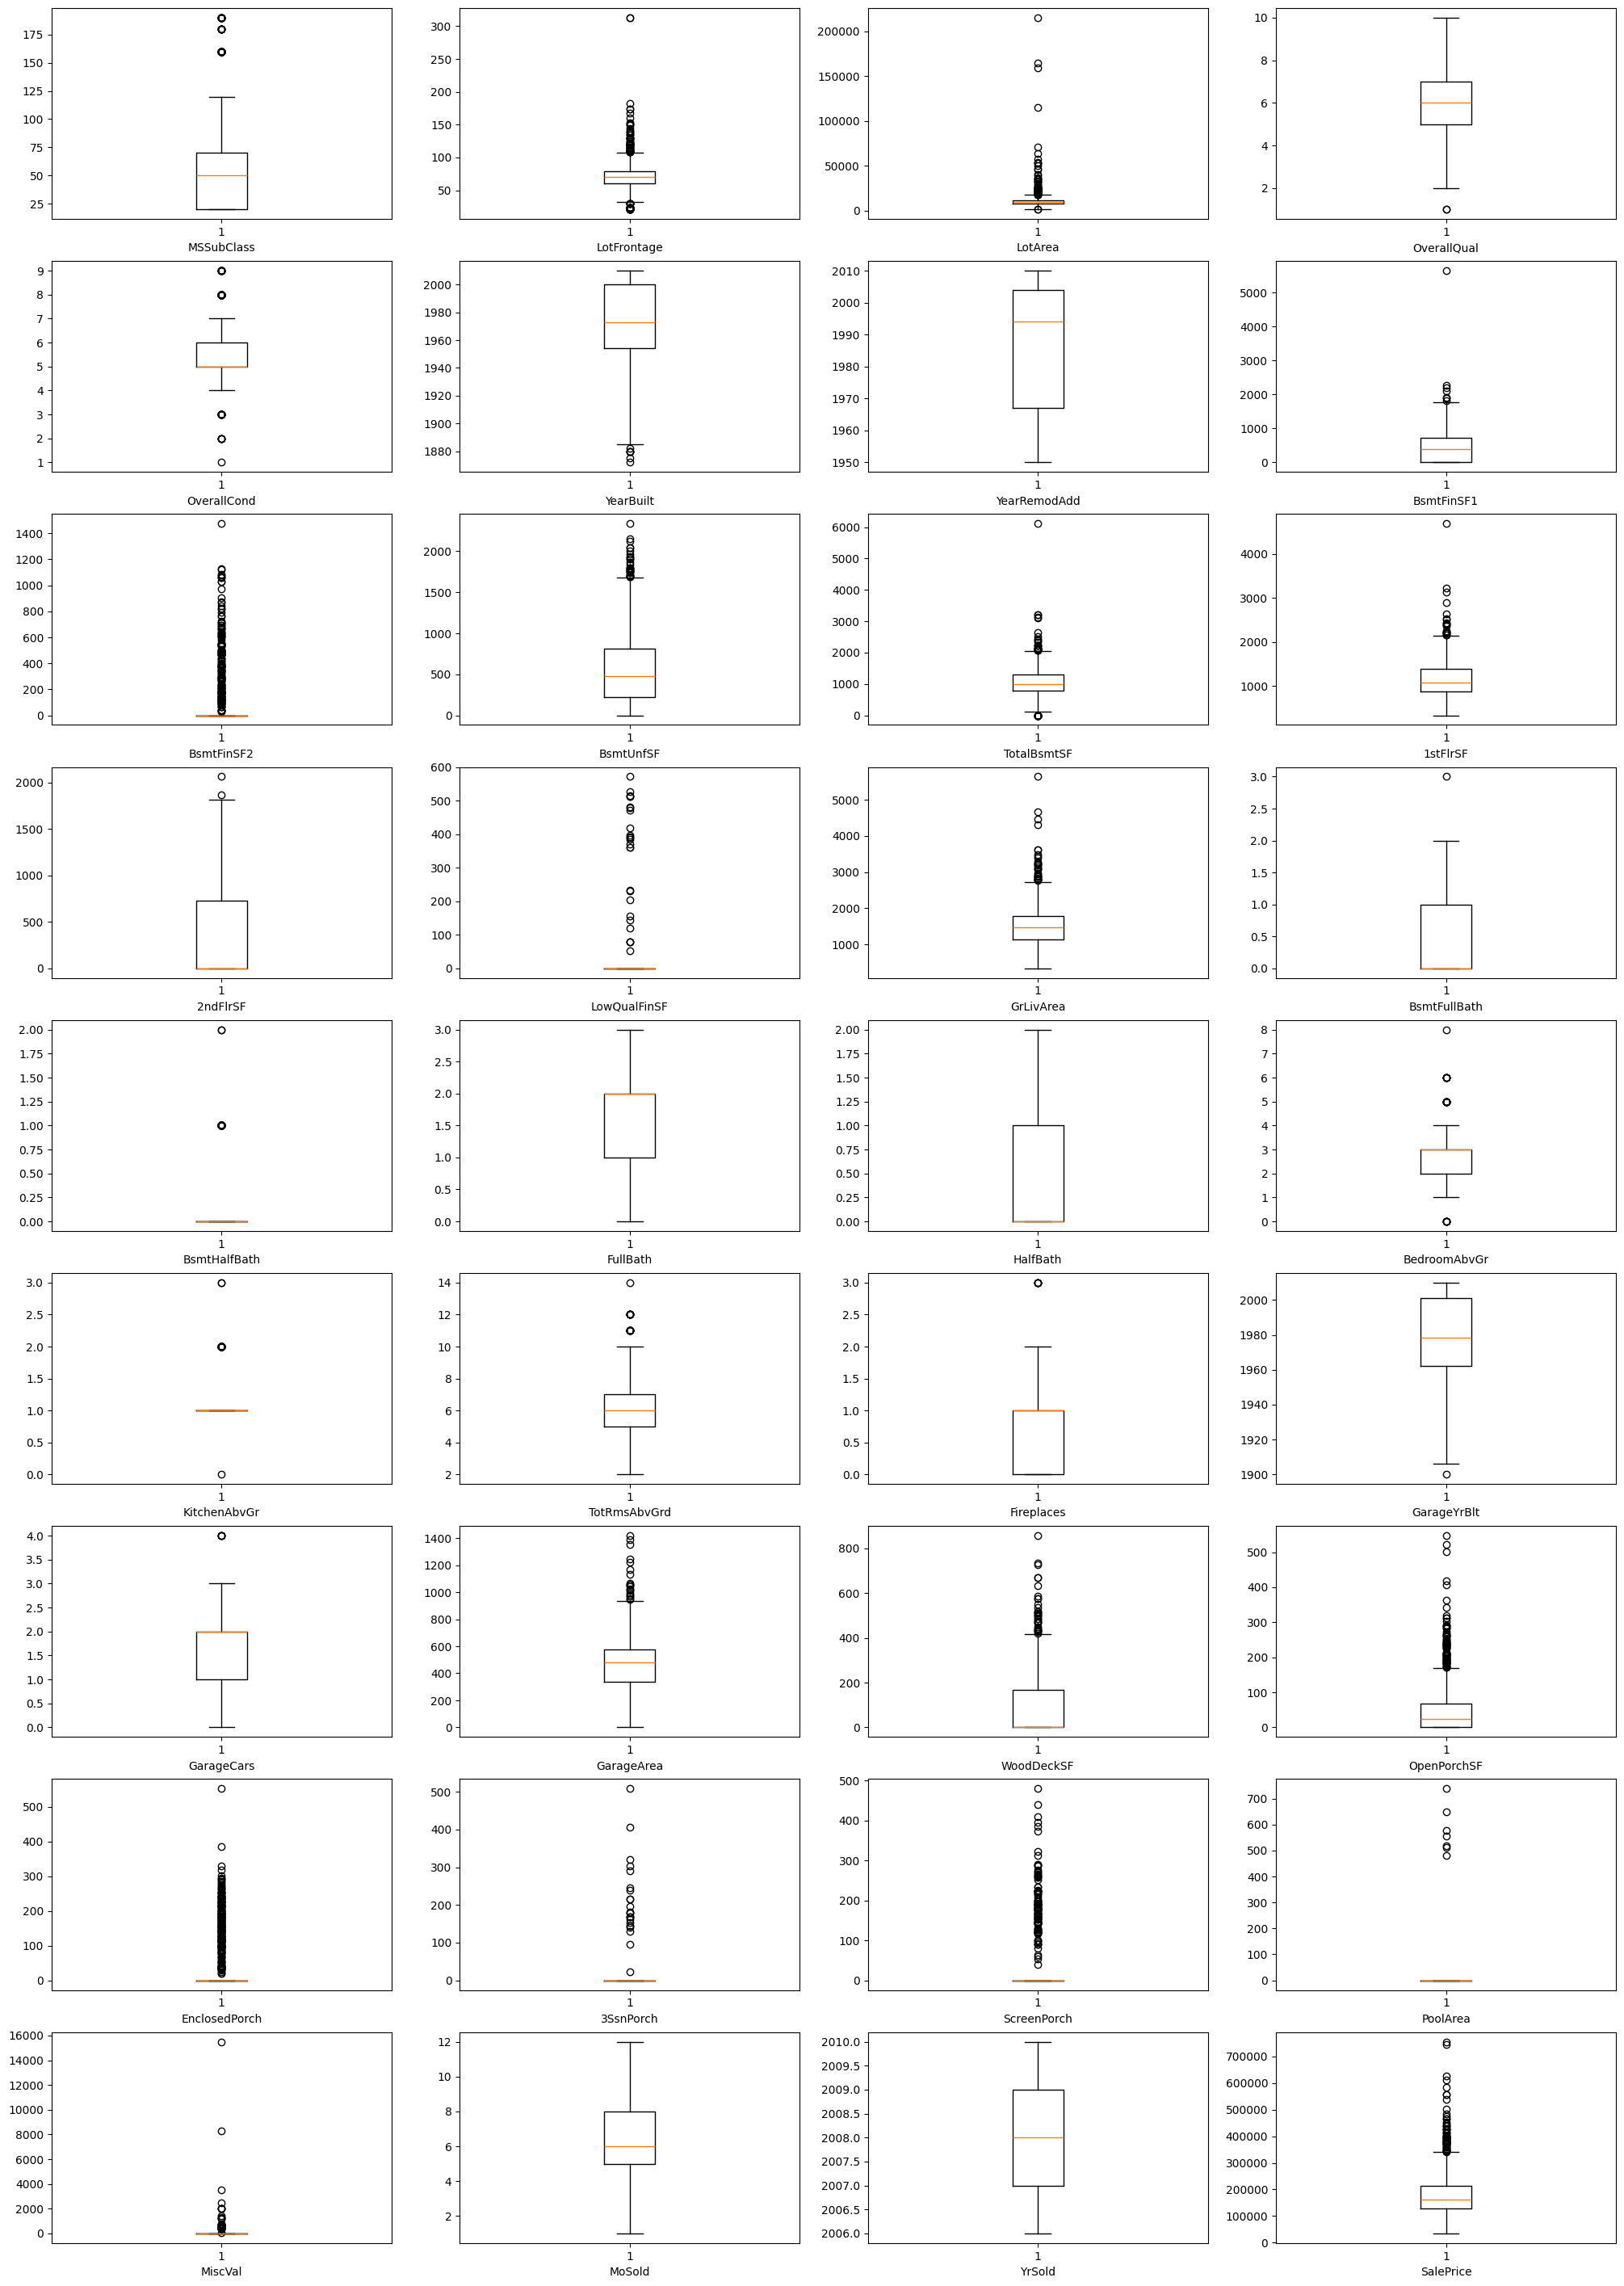

In [36]:
plt.figure(figsize=(25,40))
no_row = int((len(num_col)/4) + 1)

for i,col in enumerate(num_col):
    plt.subplot(no_row, 4, i+1)
    plt.boxplot(train_data[col])
    plt.xlabel(col)

<Axes: >

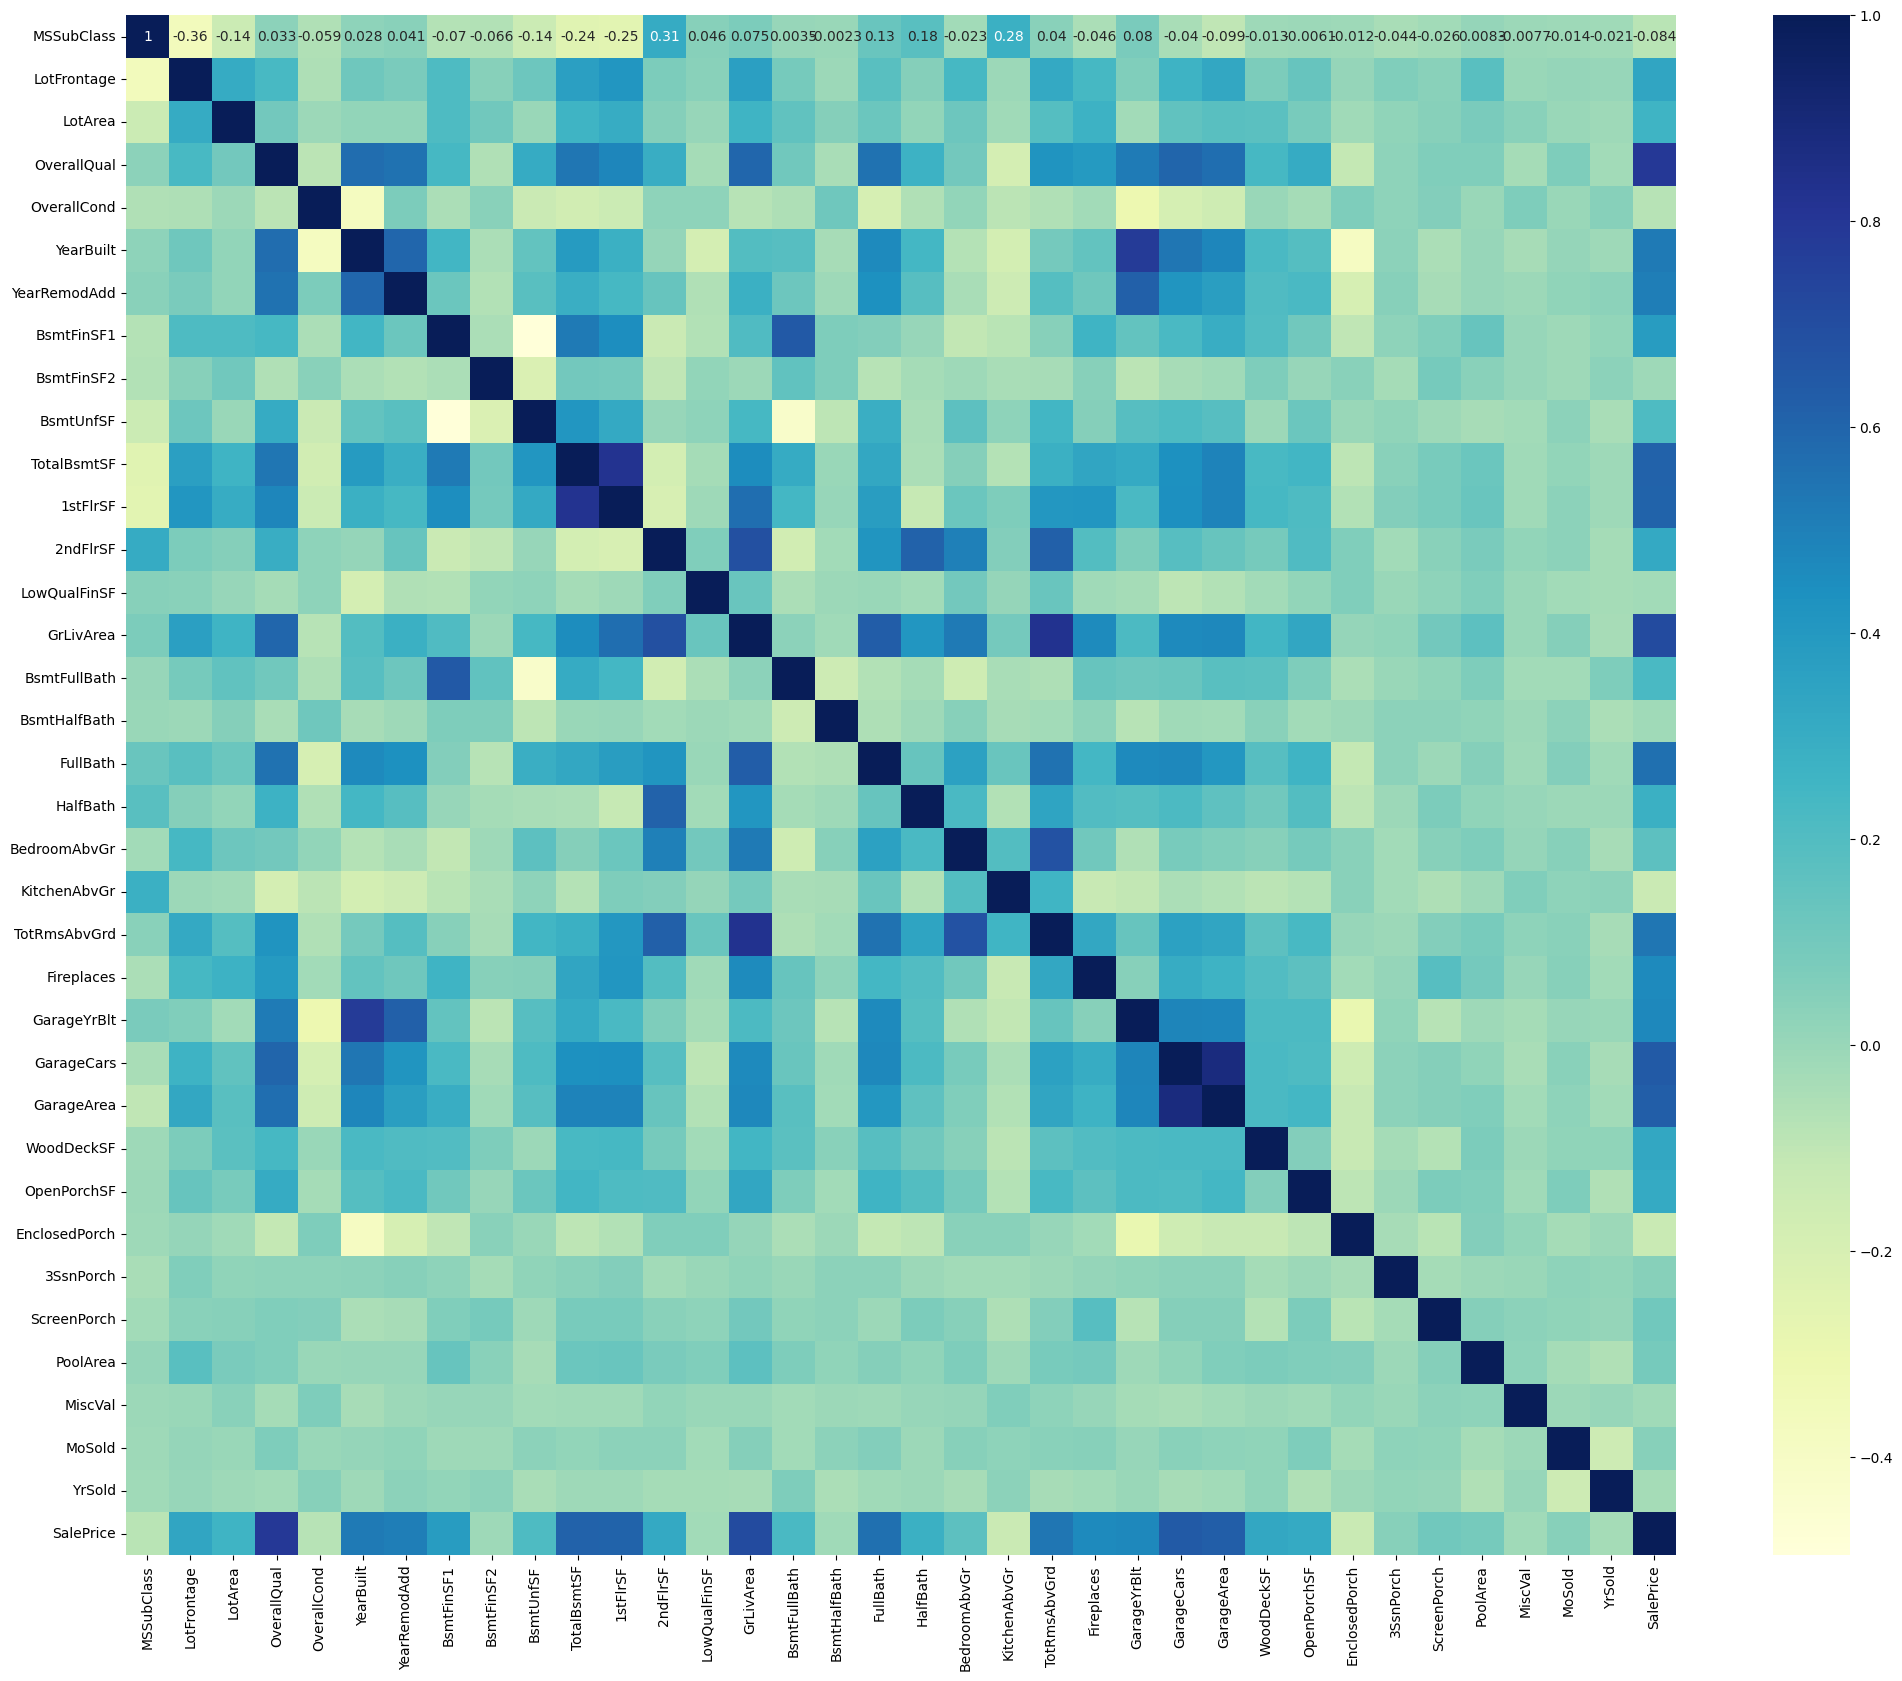

In [27]:
import seaborn as sns

plt.figure(figsize=(25,20))

corr = train_data[num_col].corr()
sns.heatmap(corr, cmap="YlGnBu", annot=True)

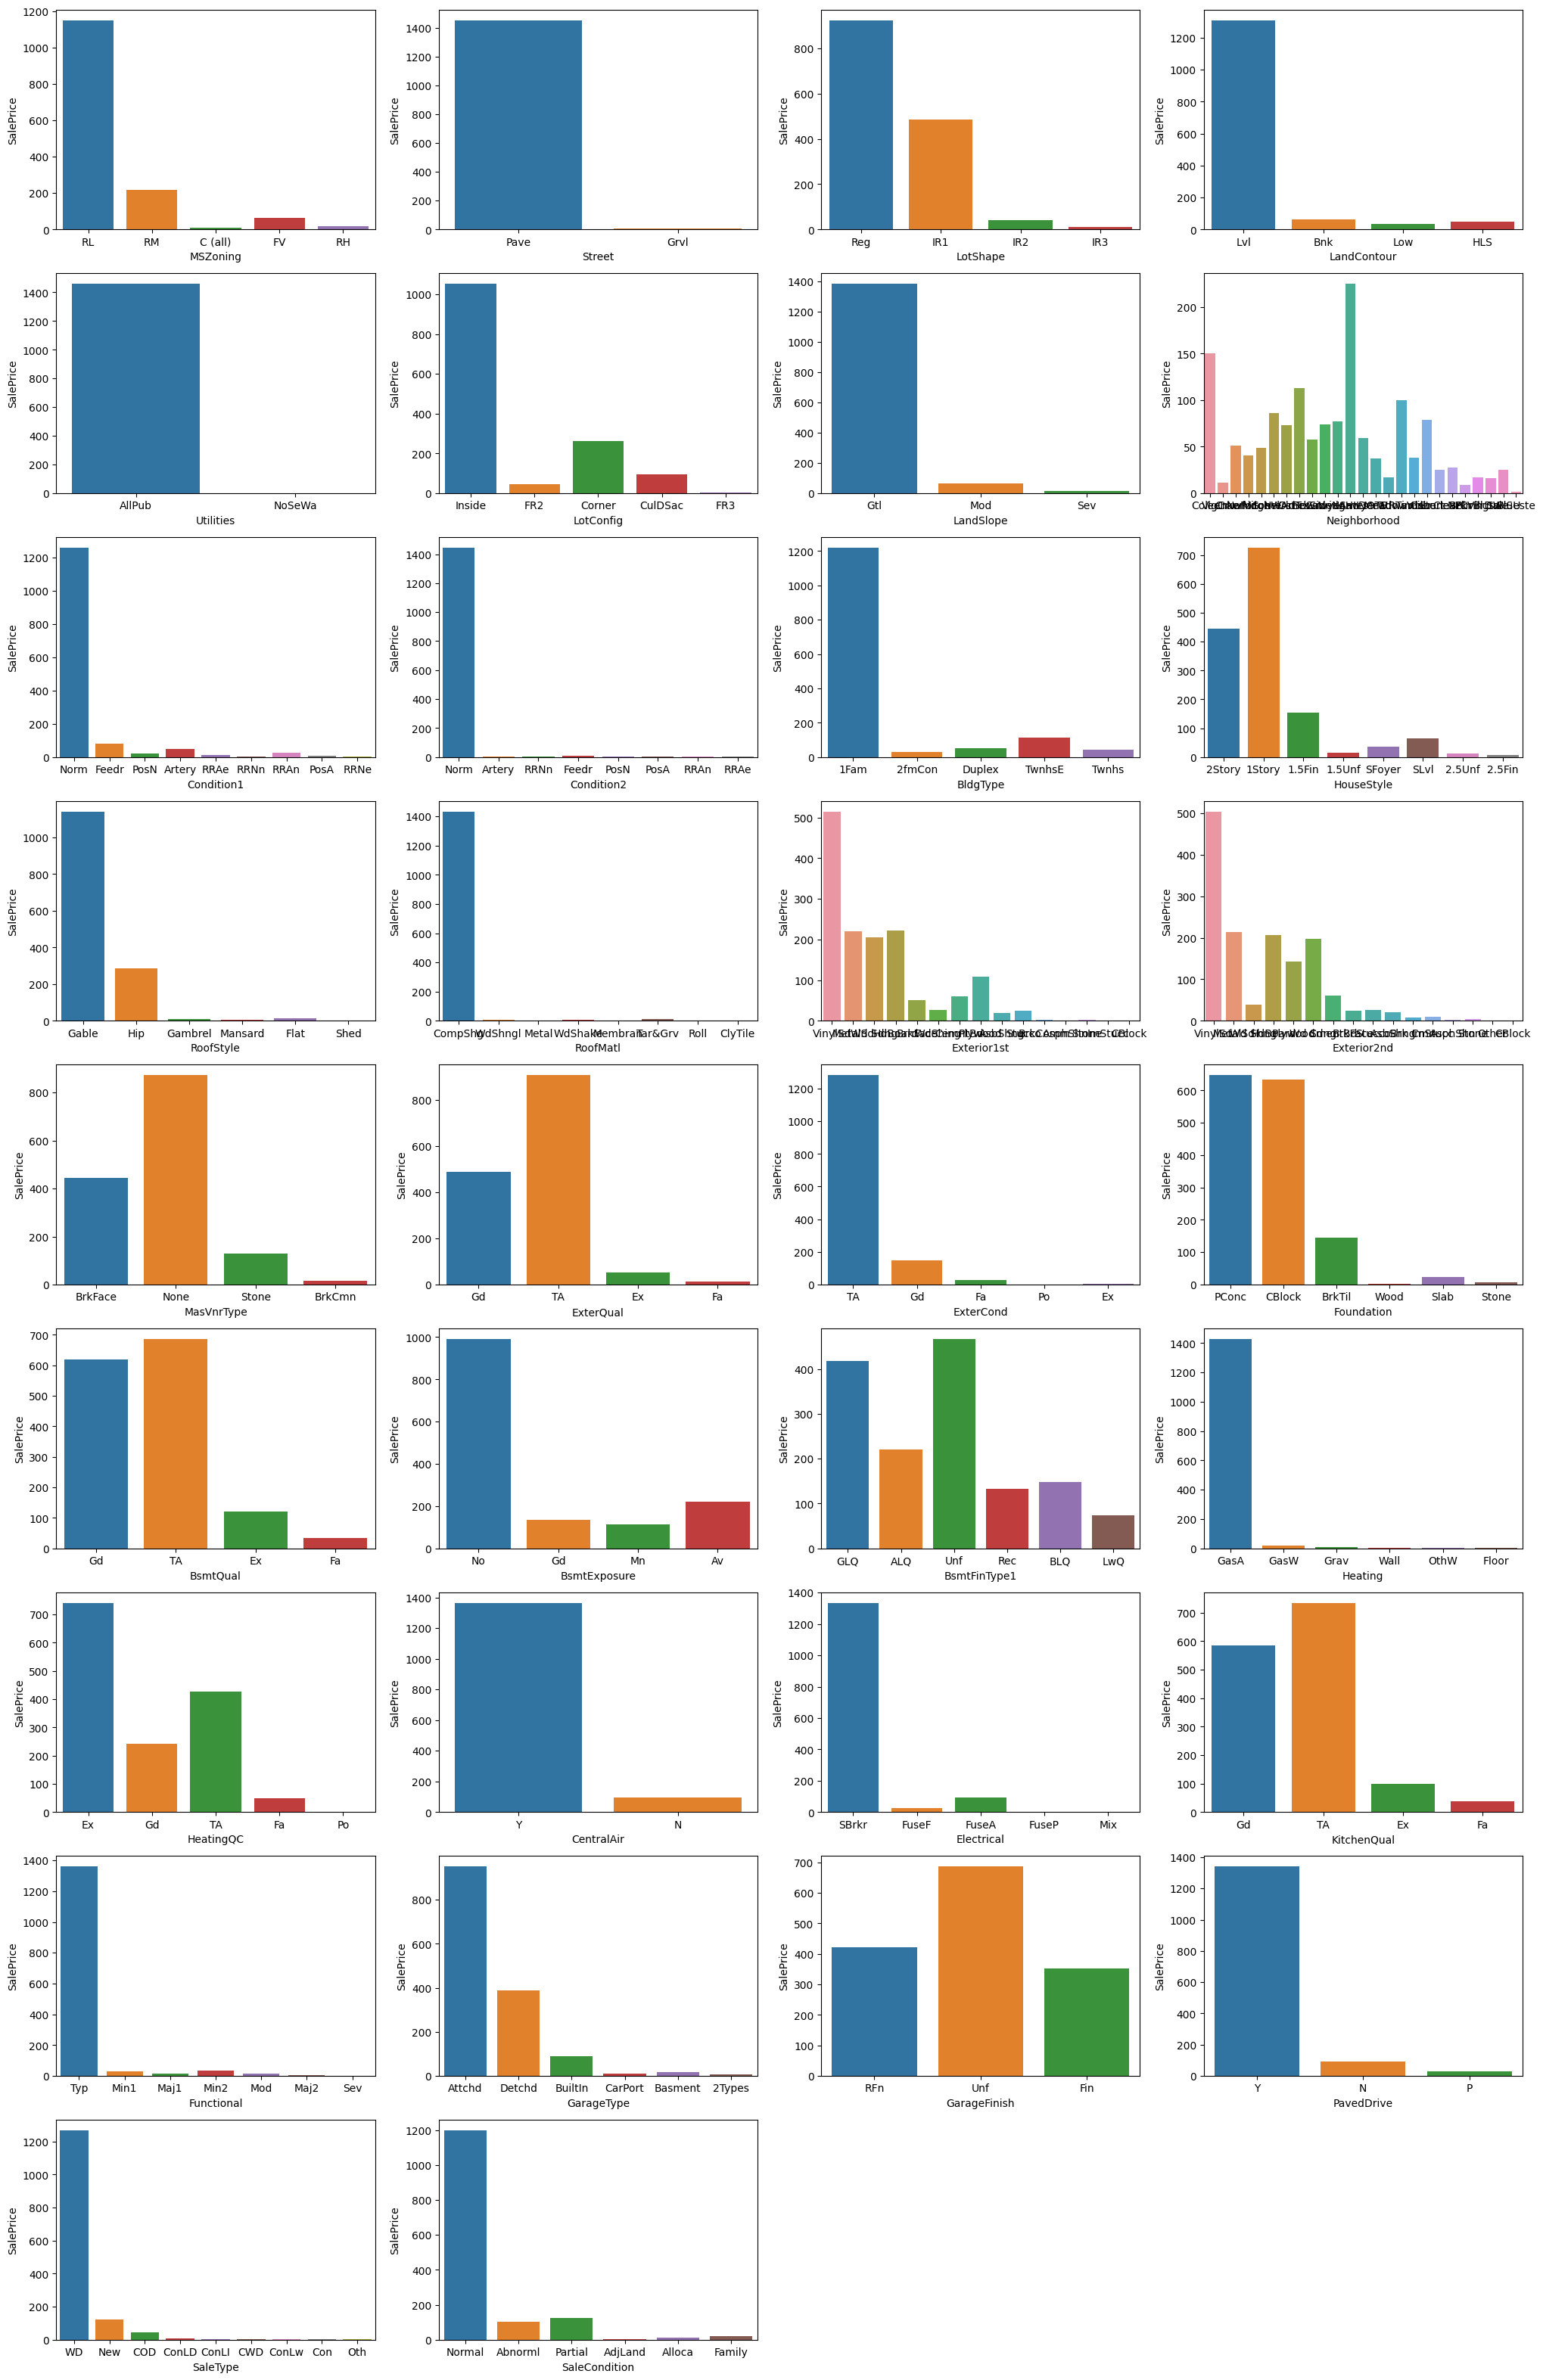

In [30]:
plt.figure(figsize=(25,40))
no_row = int((len(cat_col)/4) + 1)

for i,col in enumerate(cat_col):
    plt.subplot(no_row, 4, i+1)
    sns.countplot(x = col, data=train_data)
    plt.xlabel(col)
    plt.ylabel("SalePrice")

In [12]:
train_data["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

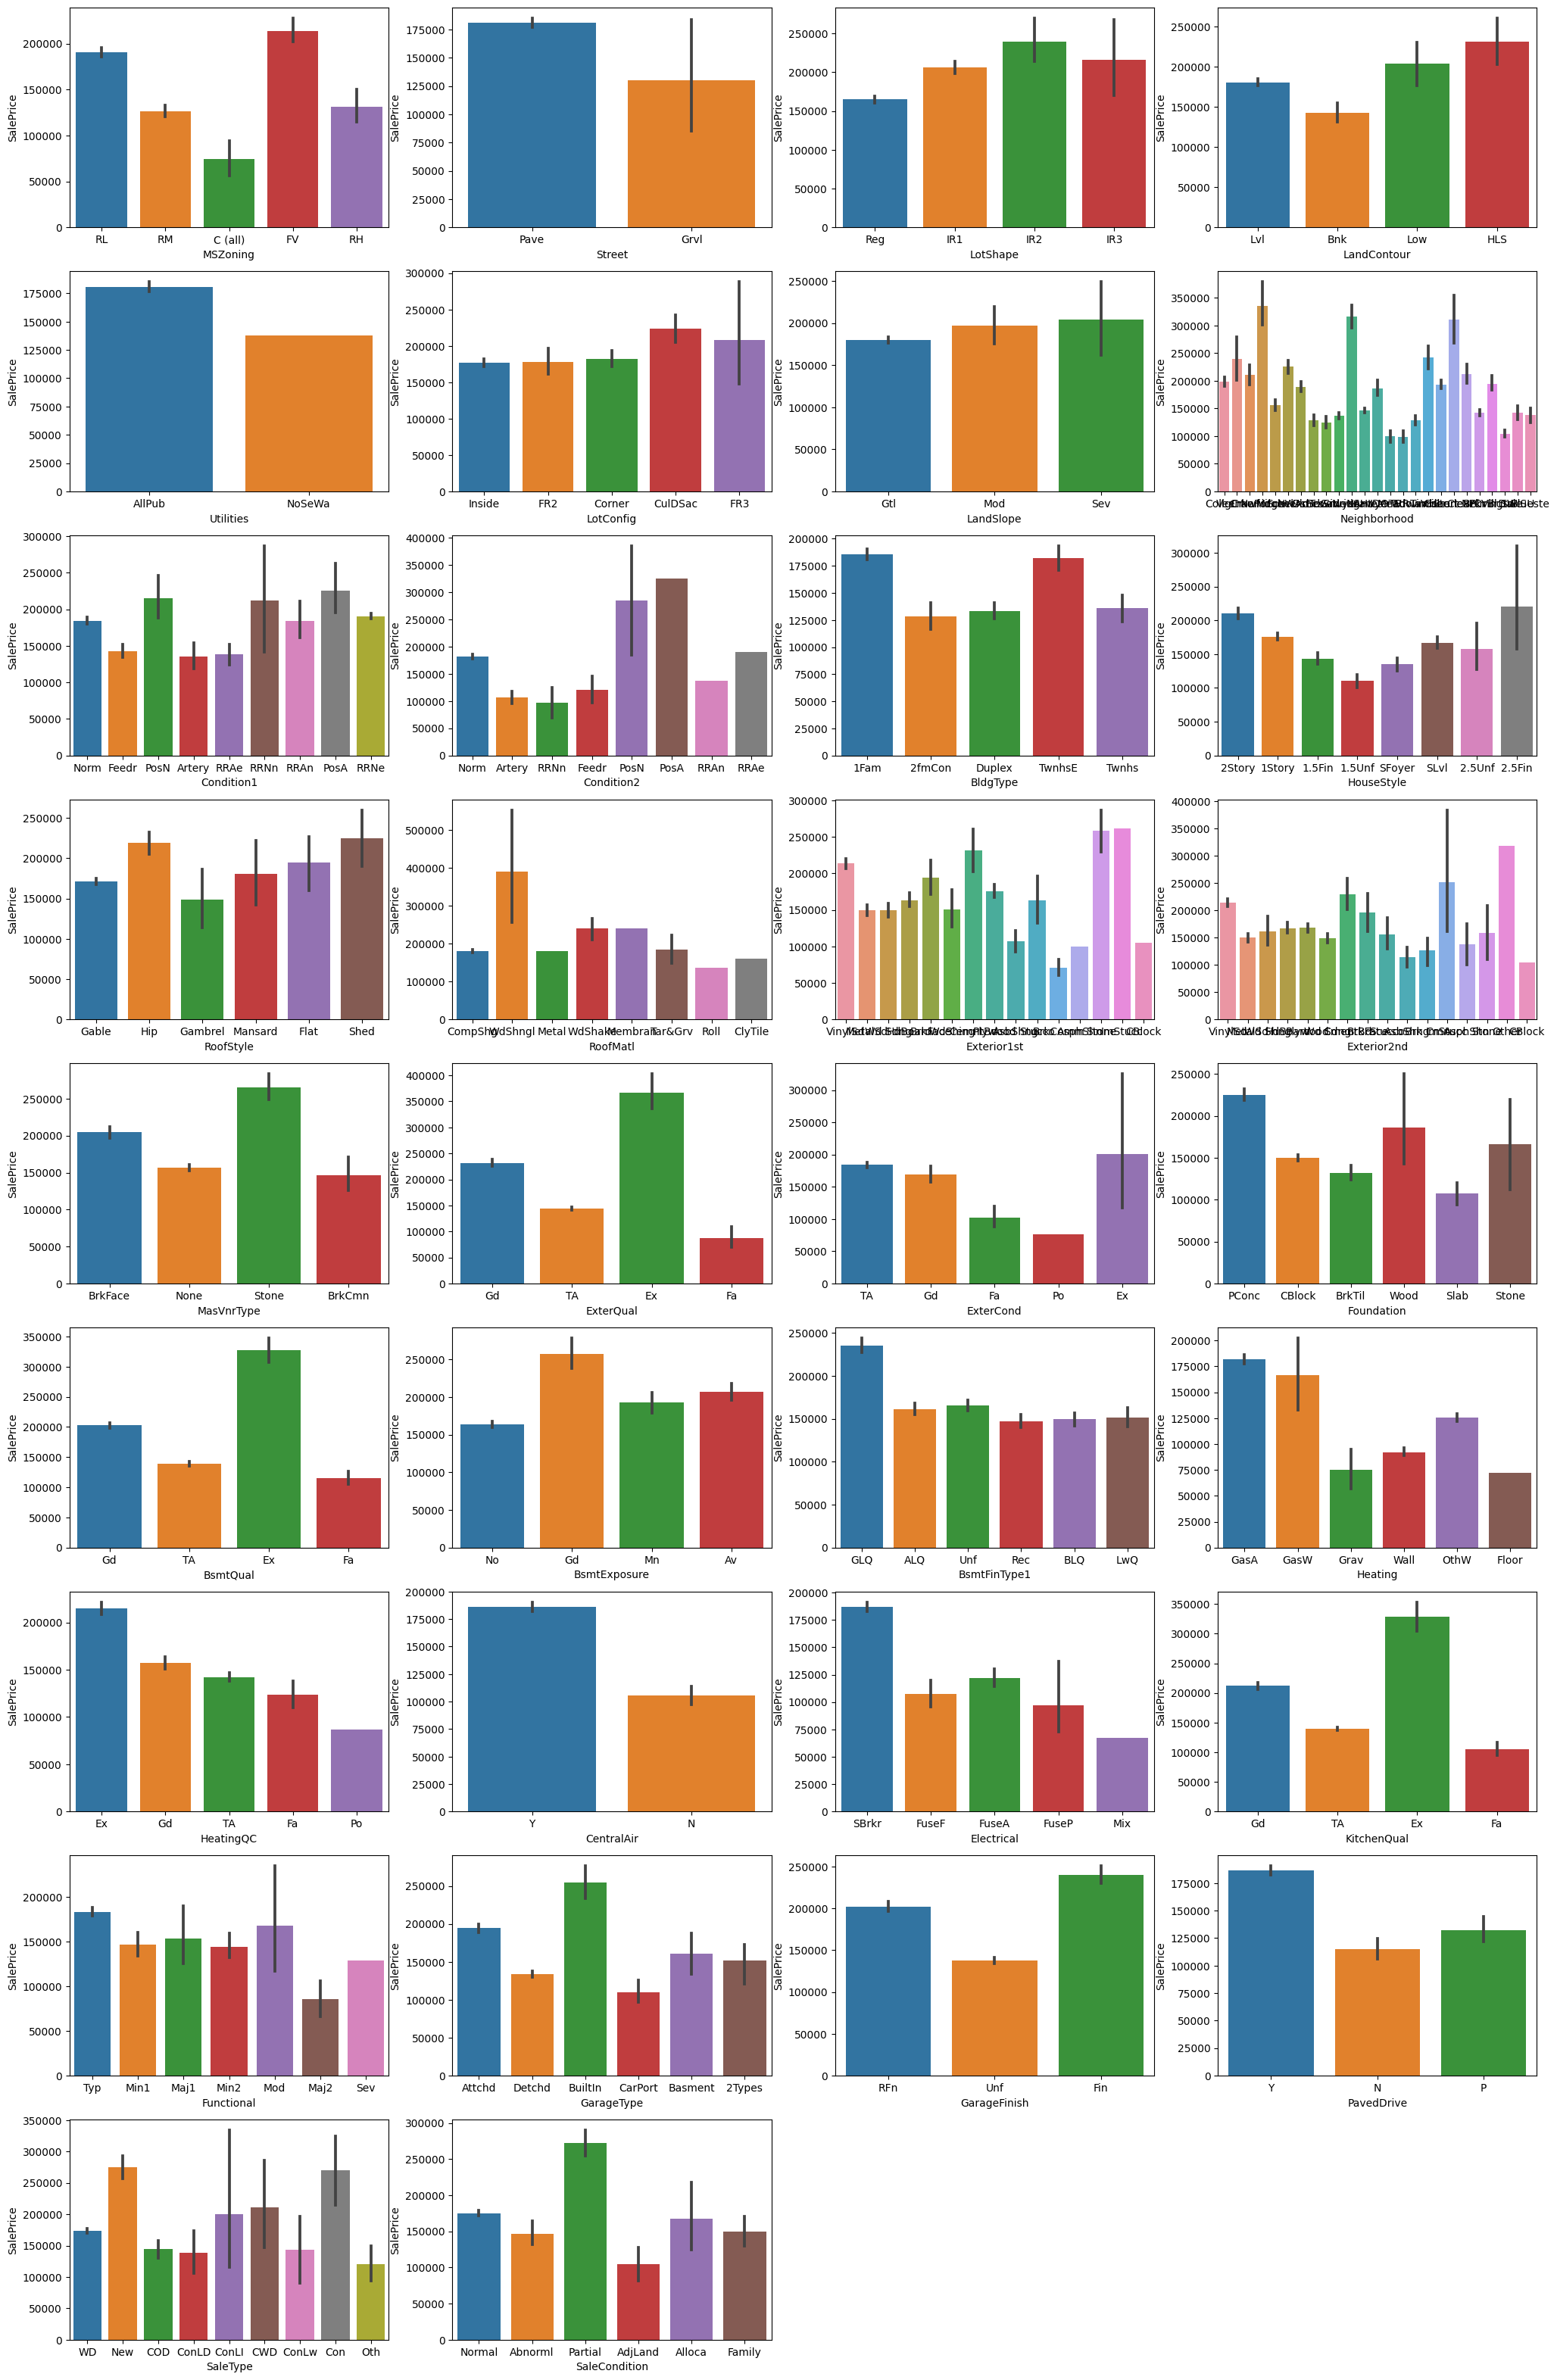

In [37]:
plt.figure(figsize=(25,40))
no_row = int((len(cat_col)/4) + 1)


for i,col in enumerate(cat_col):
    plt.subplot(no_row, 4, i+1)
    sns.barplot(x = col, y = "SalePrice", data=train_data)
    plt.xlabel(col)
    plt.ylabel("SalePrice")

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


x = ["Street", "Utilities", "LandSlope", "Condition1", "Condition2", "BldgType", "RoofMatl", "Heating", "Electrical", "Functional", "MSZoning", "LandContour", "ExterCond"]

train_data.drop(x, axis =1, inplace=True)
train_data, val_data = train_test_split(train_data, test_size=0.3, random_state=0)

train_x, test_x = train_data, val_data
train_y, test_y = train_x.pop("SalePrice"), test_x.pop("SalePrice")

vectorizer = DictVectorizer(sparse=False)
train_x = vectorizer.fit_transform(train_x.to_dict(orient = "records"))
test_x = vectorizer.transform(test_x.to_dict(orient = "records"))

In [14]:
import mlflow

# Tracking Model
mlflow.set_tracking_uri('sqlite:///mlflow.db')
mlflow.set_experiment('House SalePrice Prediction')

/home/godwin/anaconda3/lib/python3.11/site-packages/pydantic/_internal/_fields.py:128: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/godwin/anaconda3/lib/python3.11/site-packages/pydantic/_internal/_config.py:317: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


<Experiment: artifact_location='/home/godwin/Documents/Workflow/PRODIGY_ML_01/mlruns/1', creation_time=1708731534546, experiment_id='1', last_update_time=1708731534546, lifecycle_stage='active', name='House SalePrice Prediction', tags={}>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error


lr = DecisionTreeRegressor()
lr.fit(train_x, train_y)
train_pred = lr.predict(train_x)
test_pred = lr.predict(test_x)

train_mse = mean_squared_error(train_y, train_pred)**0.5
test_mse = mean_squared_error(test_y, test_pred)**0.5

In [18]:
train_mse, test_mse

(0.0, 49866.57241485916)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb26c7e7990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb26c7f0d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb26c7bbb90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb26c7f1b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb26c7f0a90>],
 'means': []}

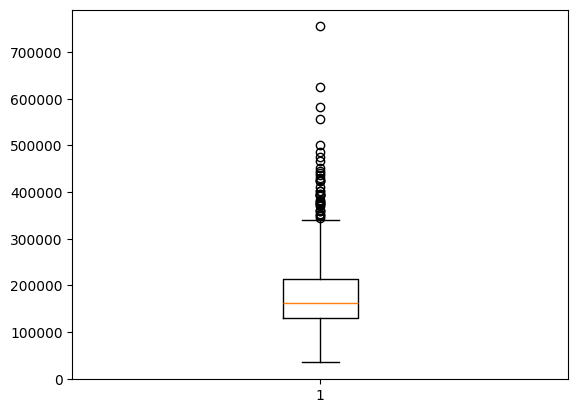

In [67]:
plt.boxplot(train_y)

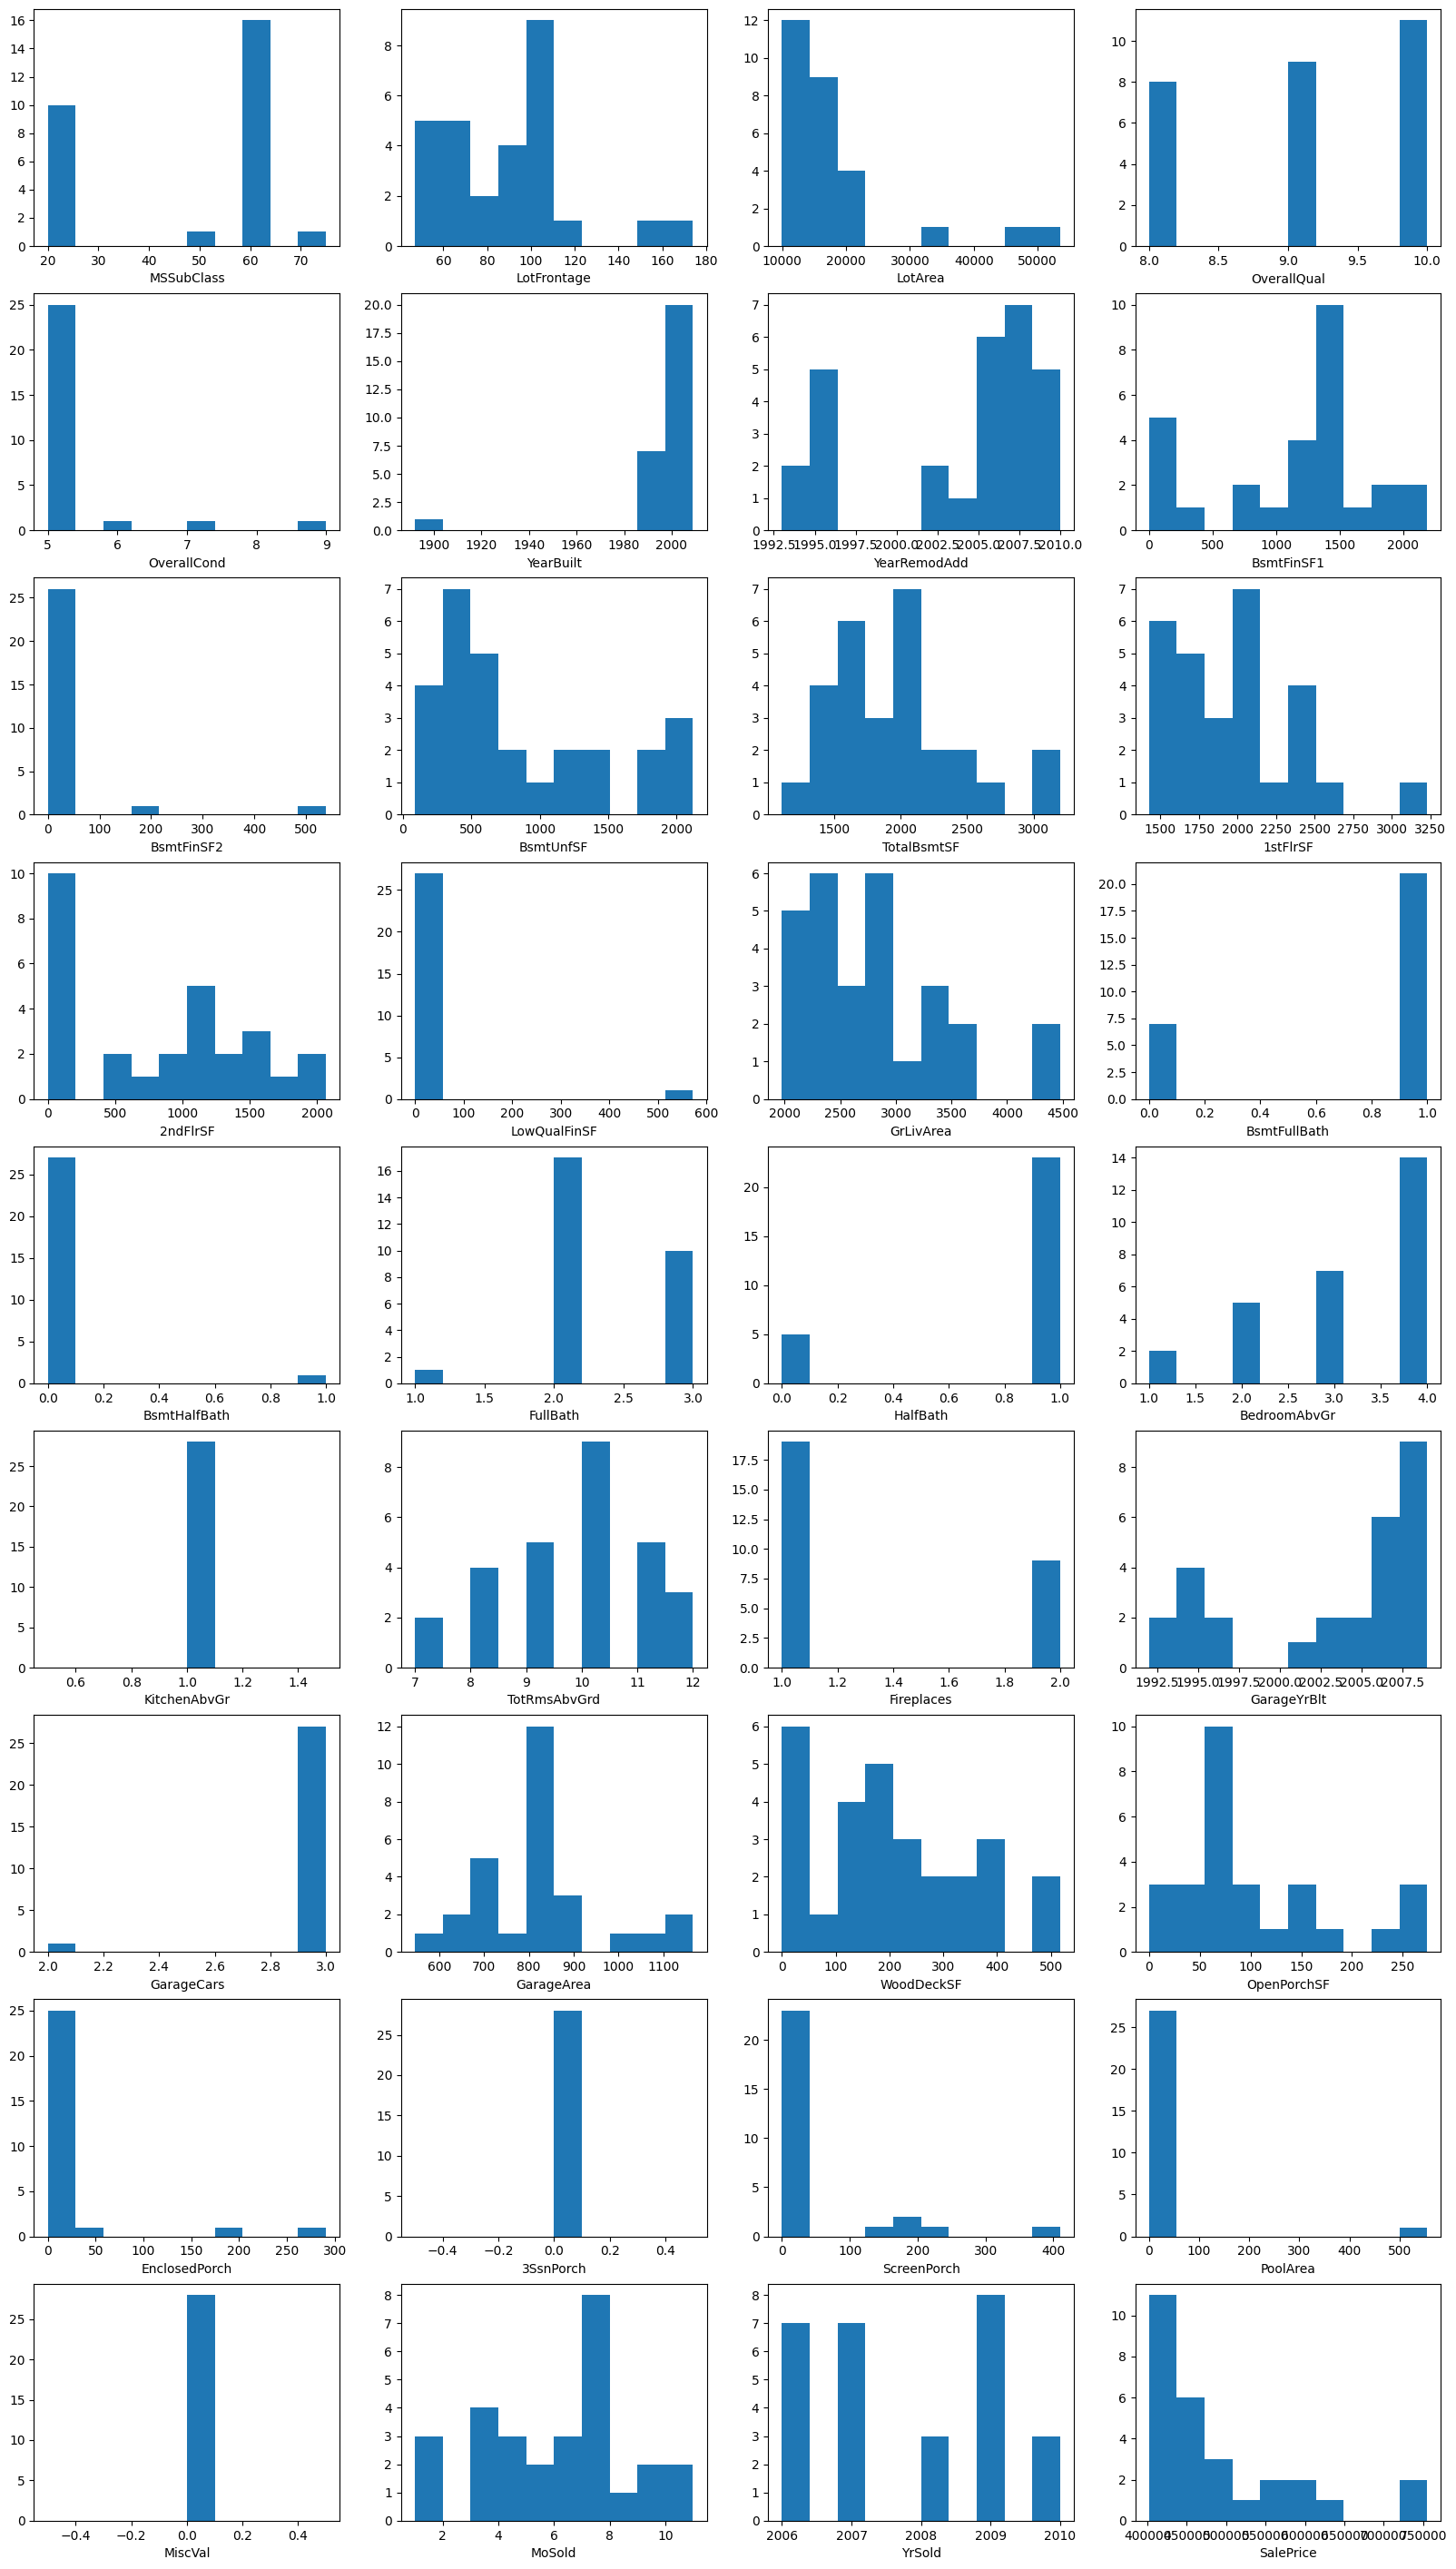

In [85]:
high = train_data[train_data["SalePrice"] >= 300000]
low = train_data[train_data["SalePrice"] <=100000]

plt.figure(figsize=(20,40))
no_row = int((len(num_col)/4) + 1)

for i,col in enumerate(num_col):
    plt.subplot(no_row, 4, i+1)
    plt.hist(high[col])
    plt.xlabel(col)

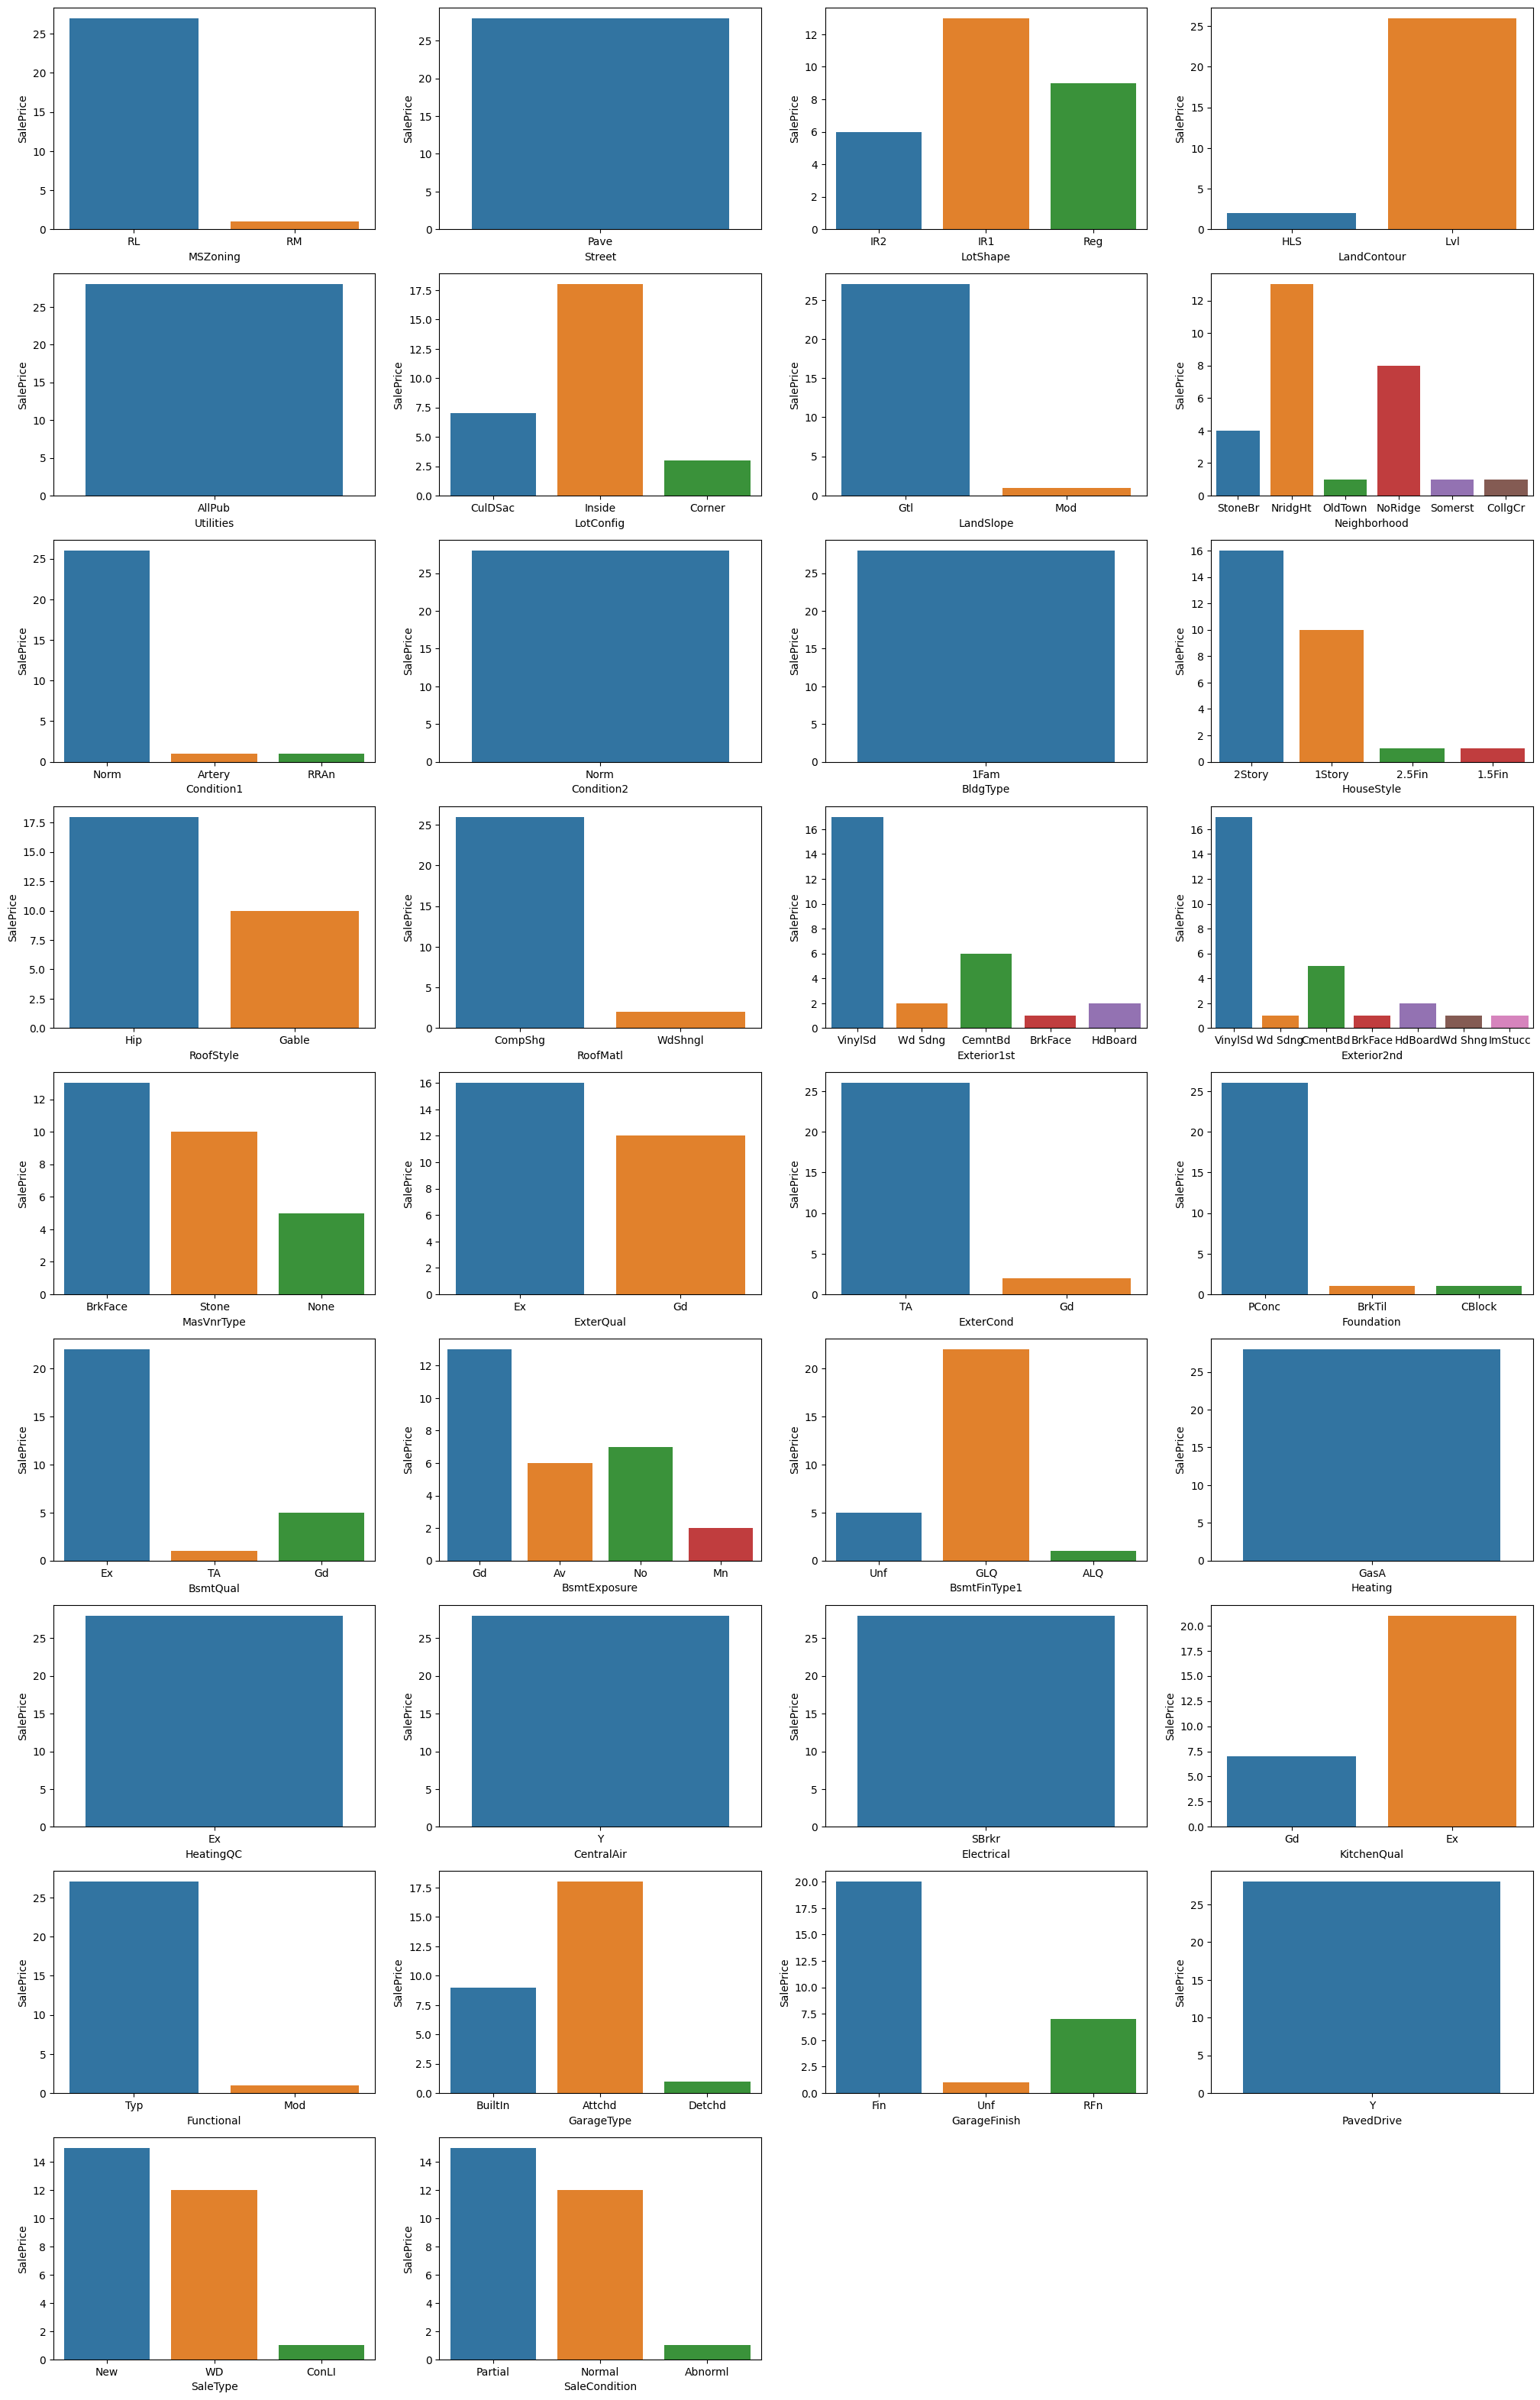

In [86]:
plt.figure(figsize=(25,40))
no_row = int((len(cat_col)/4) + 1)

for i,col in enumerate(cat_col):
    plt.subplot(no_row, 4, i+1)
    sns.countplot(x = col, data=c)
    plt.xlabel(col)
    plt.ylabel("SalePrice")

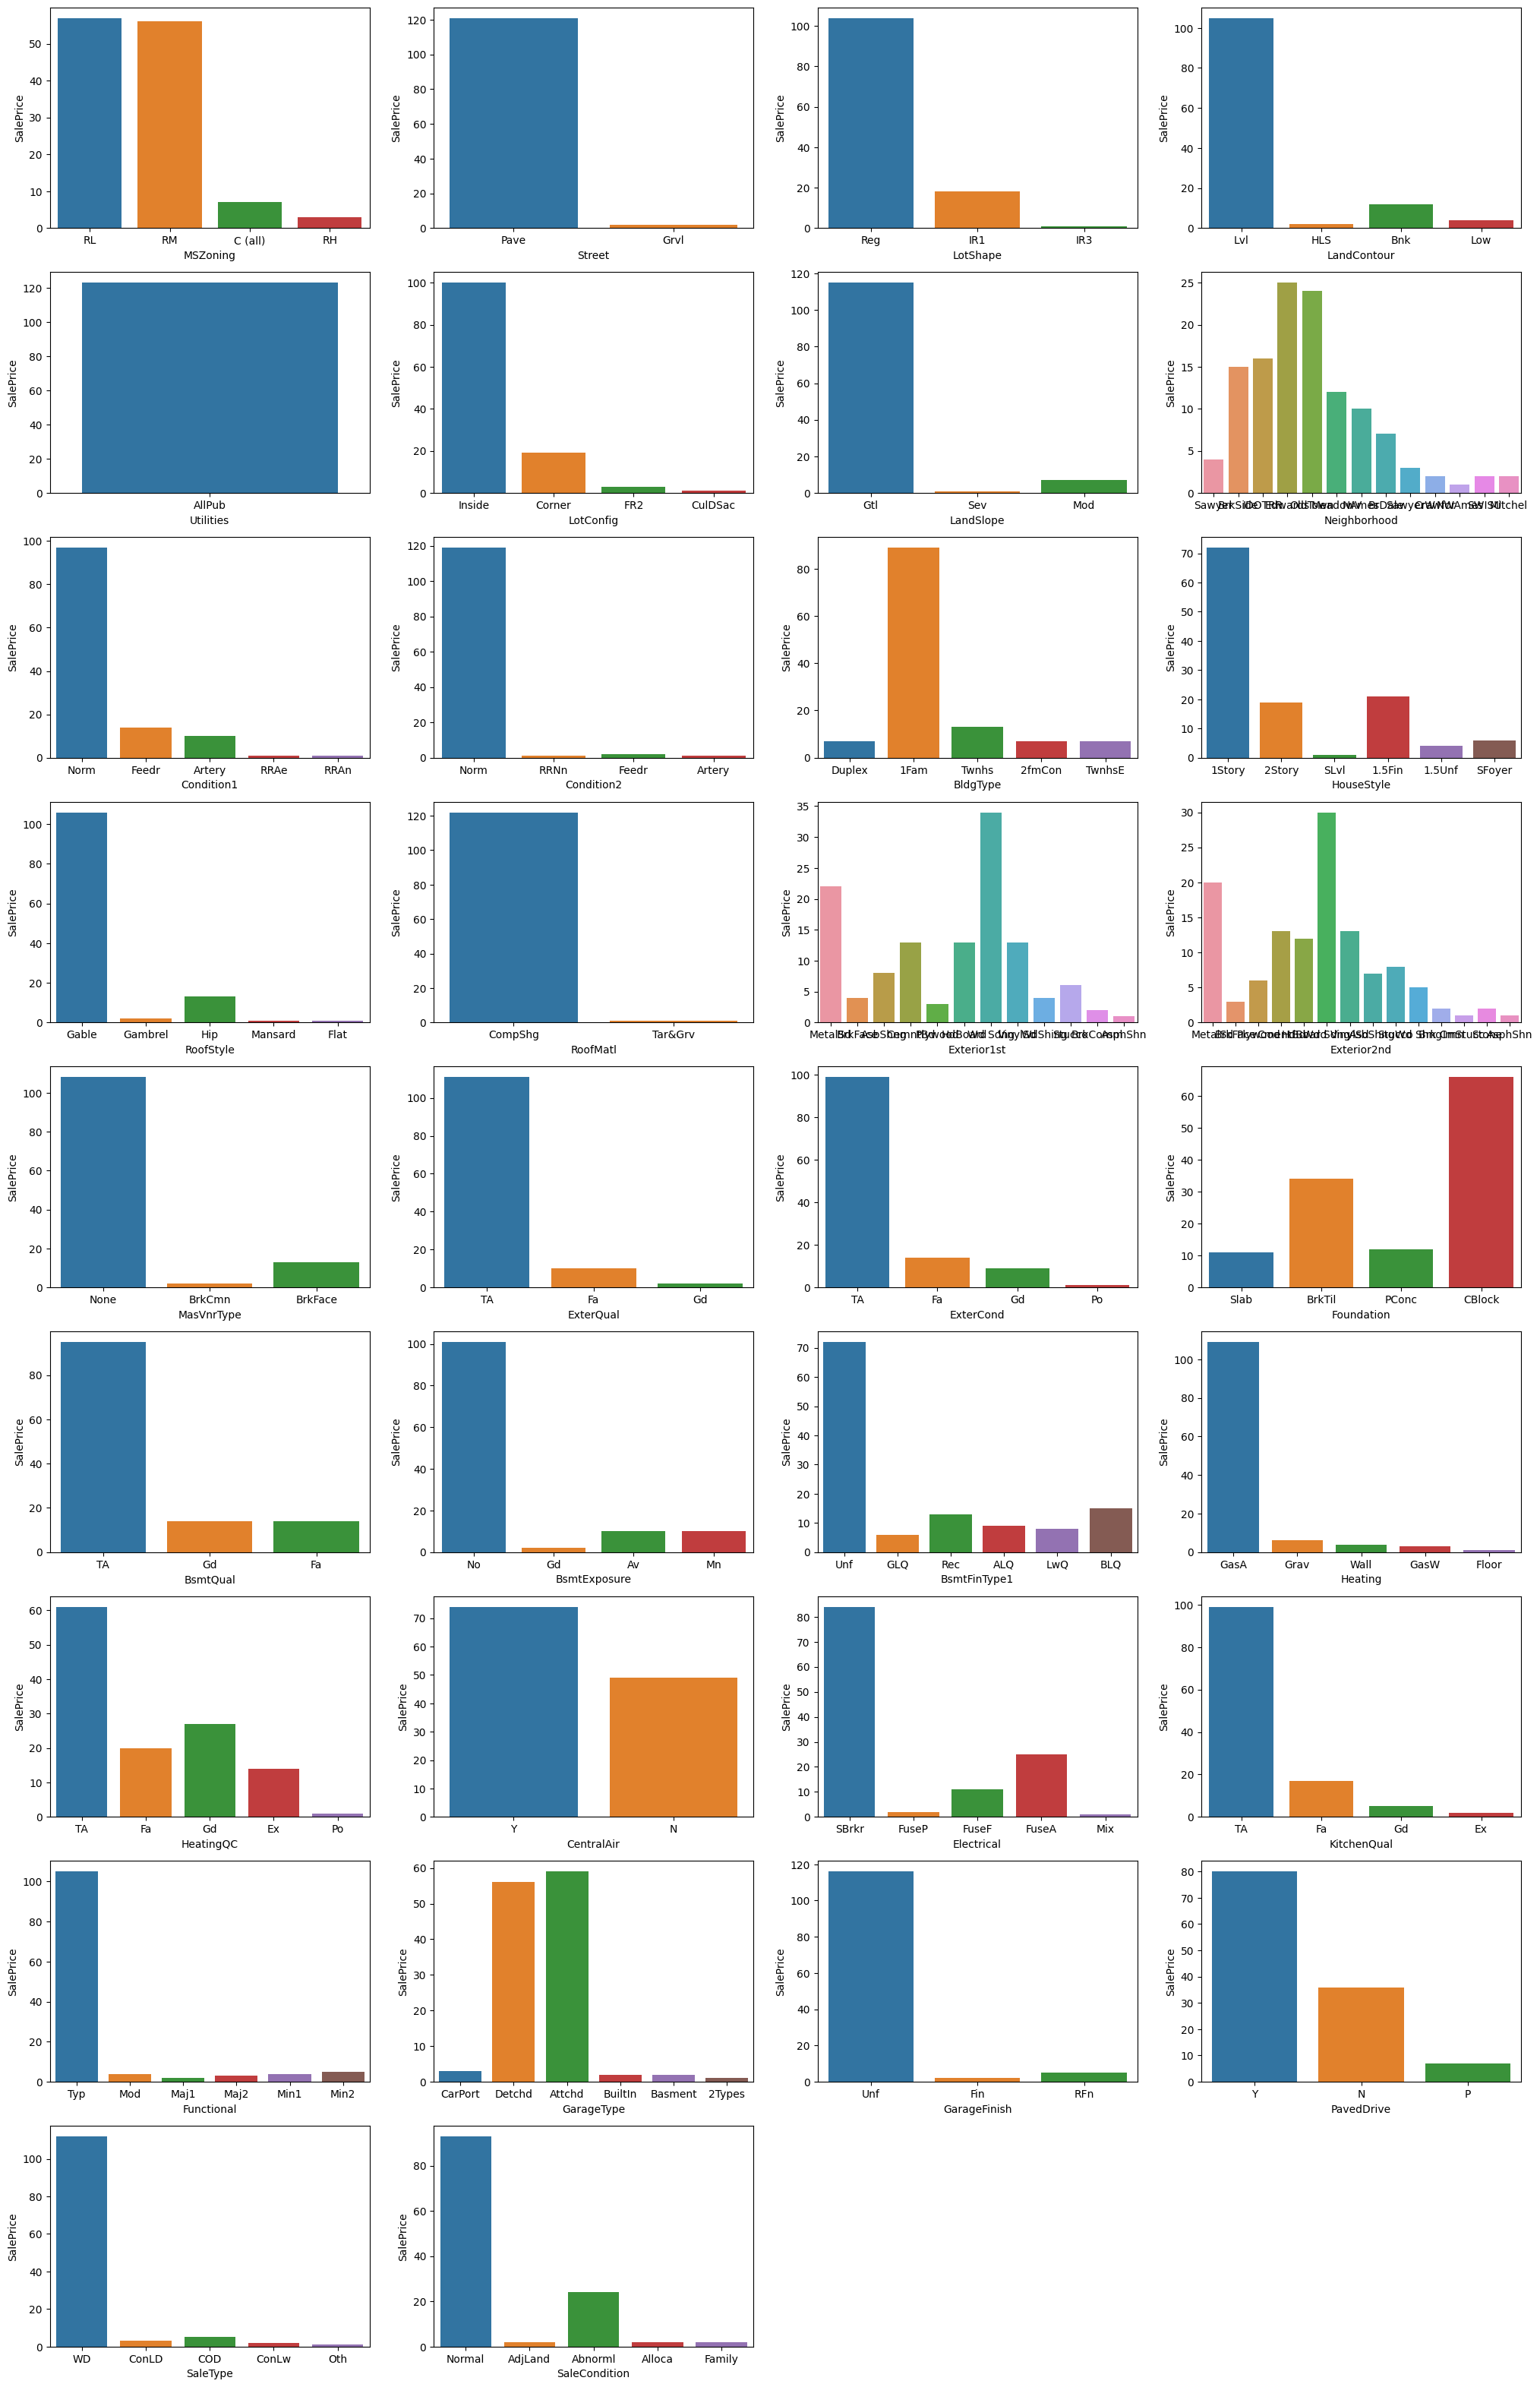

In [89]:
low = train_data[train_data["SalePrice"] <=100000]

plt.figure(figsize=(25,40))
no_row = int((len(cat_col)/4) + 1)

for i,col in enumerate(cat_col):
    plt.subplot(no_row, 4, i+1)
    sns.countplot(x = col, data=low)
    plt.xlabel(col)
    plt.ylabel("SalePrice")